## <center><font color="blue">Statistik Babak FINAL Lomba CBT OASE 2023</font>
<center><img alt="" src="images/header-oase.png"/></center> 

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import json, gspread, os, pickle
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow,Flow
from google.auth.transport.requests import Request
from collections import Counter
from tqdm import tqdm

tabels = "data/email-Juri-OASE-2023.csv"
gKey = 'data/gSheet-Key.json'
pemenang = 'data/rekap_juara_oase_2023.xlsx'

"Done"

'Done'

In [2]:
df = pd.read_csv(tabels)
df.drop_duplicates(subset=['Lomba'], keep='first', inplace=True)
df['sheet_id'] = ''
for i, d in df.iterrows():
    df.loc[i, 'sheet_id'] = d['URL'].split('/')[-2]
    
print("Data Size = {}".format(df.shape))
df.head()

Data Size = (19, 8)


,No,Lomba,Nama,status,email,HP,URL,sheet_id
0,1,Astronomi,"1. Dr. Maskufa, M.A.",Koordinator,maskufa@uinjkt.ac.id,62 813-1920-1842,https://docs.google.com/spreadsheets/d/1CJVIuN...,1CJVIuNNgGUviFF6opcsq6_7-NO3OBZJaq1yrr9-xuBI
3,4,Literasi Inovasi Teknologi,"1. Dr. Taufik Edy Sutanto, MScTech",Koordinator,taufikedys@gmail.com,62 89637884174,https://docs.google.com/spreadsheets/d/1EuA_AA...,1EuA_AAxBsTlhb00F7DqoUkMC_ZFlt35CzFPqeZXpkW0
6,7,Robotik,"1. Nenny Anggraini, S.Kom., MT",Koordinator,nenny.anggraini@uinjkt.ac.id,62 812-9221-8712,https://docs.google.com/spreadsheets/d/19CJBHR...,19CJBHRLJ1shaa-TPdcMGcO46zJqi3GzPKUXiqgvID-E
9,10,Iklim dan Lingkungan,"1. Dr. Hendrawati, M. Si",Koordinator,hendrawatishaleh.1972@gmail.com,62 813-1516-1379,https://docs.google.com/spreadsheets/d/1ASkakx...,1ASkakxsxoZ7_ObOpjeUimkmBknAccP-ny1Hsyb49PQ4
12,13,Karya Tulis Ilmiah al-Qur'an,"1. Dr. Syahrullah, M.A.",Koordinator,syahrullahisk@gmail.com,62 852-1623-3344,https://docs.google.com/spreadsheets/d/1FXTtkY...,1FXTtkYQywAer-GbObG78x4lFzIS0fJSuGofcv9DOJGI


In [3]:
Resume_ = False
"""
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
sheet_range = 'A1:ZZ'
data = {}
count_ = 0
for i, d in df.iterrows():
    fName = 'data/gSheets/{}.csv'.format(d.Lomba)
    if Resume_:
        data[d.Lomba] = df.read_csv(fName)
    elif len(str(d.sheet_id))>4:
        try:
            global values_input, service
            creds = None
            if os.path.exists('token.pickle'):
                with open('token.pickle', 'rb') as token:
                    creds = pickle.load(token)
            if not creds or not creds.valid:
                if creds and creds.expired and creds.refresh_token:
                    creds.refresh(Request())
                else:
                    flow = InstalledAppFlow.from_client_secrets_file(gKey, SCOPES)
                    creds = flow.run_local_server(port=0)
                with open('token.pickle', 'wb') as token:
                    pickle.dump(creds, token)

            service = build('sheets', 'v4', credentials=creds)
            # Call the Sheets API
            sheet = service.spreadsheets()
            dfLomba = sheet.values().get(spreadsheetId=d.sheet_id, range=sheet_range).execute()
            dfLomba = dfLomba.get('values', [])
            headers = dfLomba[0]
            if len(headers)<len(dfLomba[1:][0]):
                lH = len(headers)
                lV = len(dfLomba[1:][0])
                for i in range(1, lV-lH+1):
                    headers.append("idx_{}".format(i))
            
            dfLomba = pd.DataFrame(dfLomba[1:], columns=headers)    
            dfLomba.dropna(subset=['Juri'], inplace=True)
            data[d.Lomba] = dfLomba
            dfLomba.to_csv(fName, index=False,  encoding='utf8')
            count_ += 1
        except Exception as err_:
            #print(err_)
            print('No data found on Lomba {}.'.format(d.Lomba))
            data[d.Lomba] = None
            #break
print("{} sheets imported".format(count_))
"""
''

''

In [4]:
data = pd.ExcelFile(pemenang)
sheets = data.sheet_names
print(len(sheets))
print(sheets)

25
['Robotik', 'Halal', 'Nanoteknologi', 'MediaPembelajaran', 'LIT', 'Arsitektur', 'Iklim', 'KTA', 'Kimia', 'Biologi', 'Fisika', 'Matematika', 'Astronomi', 'Business', 'DaiPutra', 'DaiPutri', 'DBA', 'DBI', 'DBK', 'Psikologi', 'FahmilQuran', 'QiroatulPutra', 'QiroatulPutri', 'StoryTelling', 'SosialKeagamaan']


In [5]:
fName = 'data/hasil-rekap-juara-oase-2023.csv'
try:
    df_juara = pd.read_csv(fName)
except:
    pass
    juara = {'PTKI':[], 'Juara':[], 'Lomba':[]}
    vals = ['Juara 0{}'.format(i) for i in range(1,7)]
    for s in sheets:
        df = pd.read_excel(data, sheet_name=s, index_col=None, header=0)
        if s=='Matematika':
            for ptki in df['PTKI']:
                juara['PTKI'].append(ptki)
                juara['Juara'].append('Juara 01')
                juara['Lomba'].append(s)
        else:
            try:
                df.dropna(subset=['Keterangan'], inplace=True)
            except:
                pass
            df.drop_duplicates(subset=['PTKI'], keep='first', inplace=True)
            ptki = df['PTKI'].to_list()
            for v, p in zip(vals, ptki):
                juara['PTKI'].append(p)
                juara['Juara'].append(v)
                juara['Lomba'].append(s)

    df_juara = pd.DataFrame(juara)
    df_juara.to_csv(fName, index=False)
df_juara.head()

,PTKI,Juara,Lomba
0,UIN Ar-Raniry Banda Aceh,Juara 01,Arsitektur
1,UIN Alauddin Makassar,Juara 02,Arsitektur
2,UIN Walisongo Semarang,Juara 03,Arsitektur
3,UIN Maulana Malik Ibrahim Malang,Juara 04,Arsitektur
4,UIN Maulana Malik Ibrahim Malang,Juara 05,Arsitektur


In [6]:
rep = {'Juara 01':'Emas', 'Juara 02':'Perak', 'Juara 03':'Perunggu'}
for k, v in rep.items():
    df_juara.replace(to_replace=[k], value=v, inplace=True)
    
df_juara.head()

,PTKI,Juara,Lomba
0,UIN Ar-Raniry Banda Aceh,Emas,Arsitektur
1,UIN Alauddin Makassar,Perak,Arsitektur
2,UIN Walisongo Semarang,Perunggu,Arsitektur
3,UIN Maulana Malik Ibrahim Malang,Juara 04,Arsitektur
4,UIN Maulana Malik Ibrahim Malang,Juara 05,Arsitektur


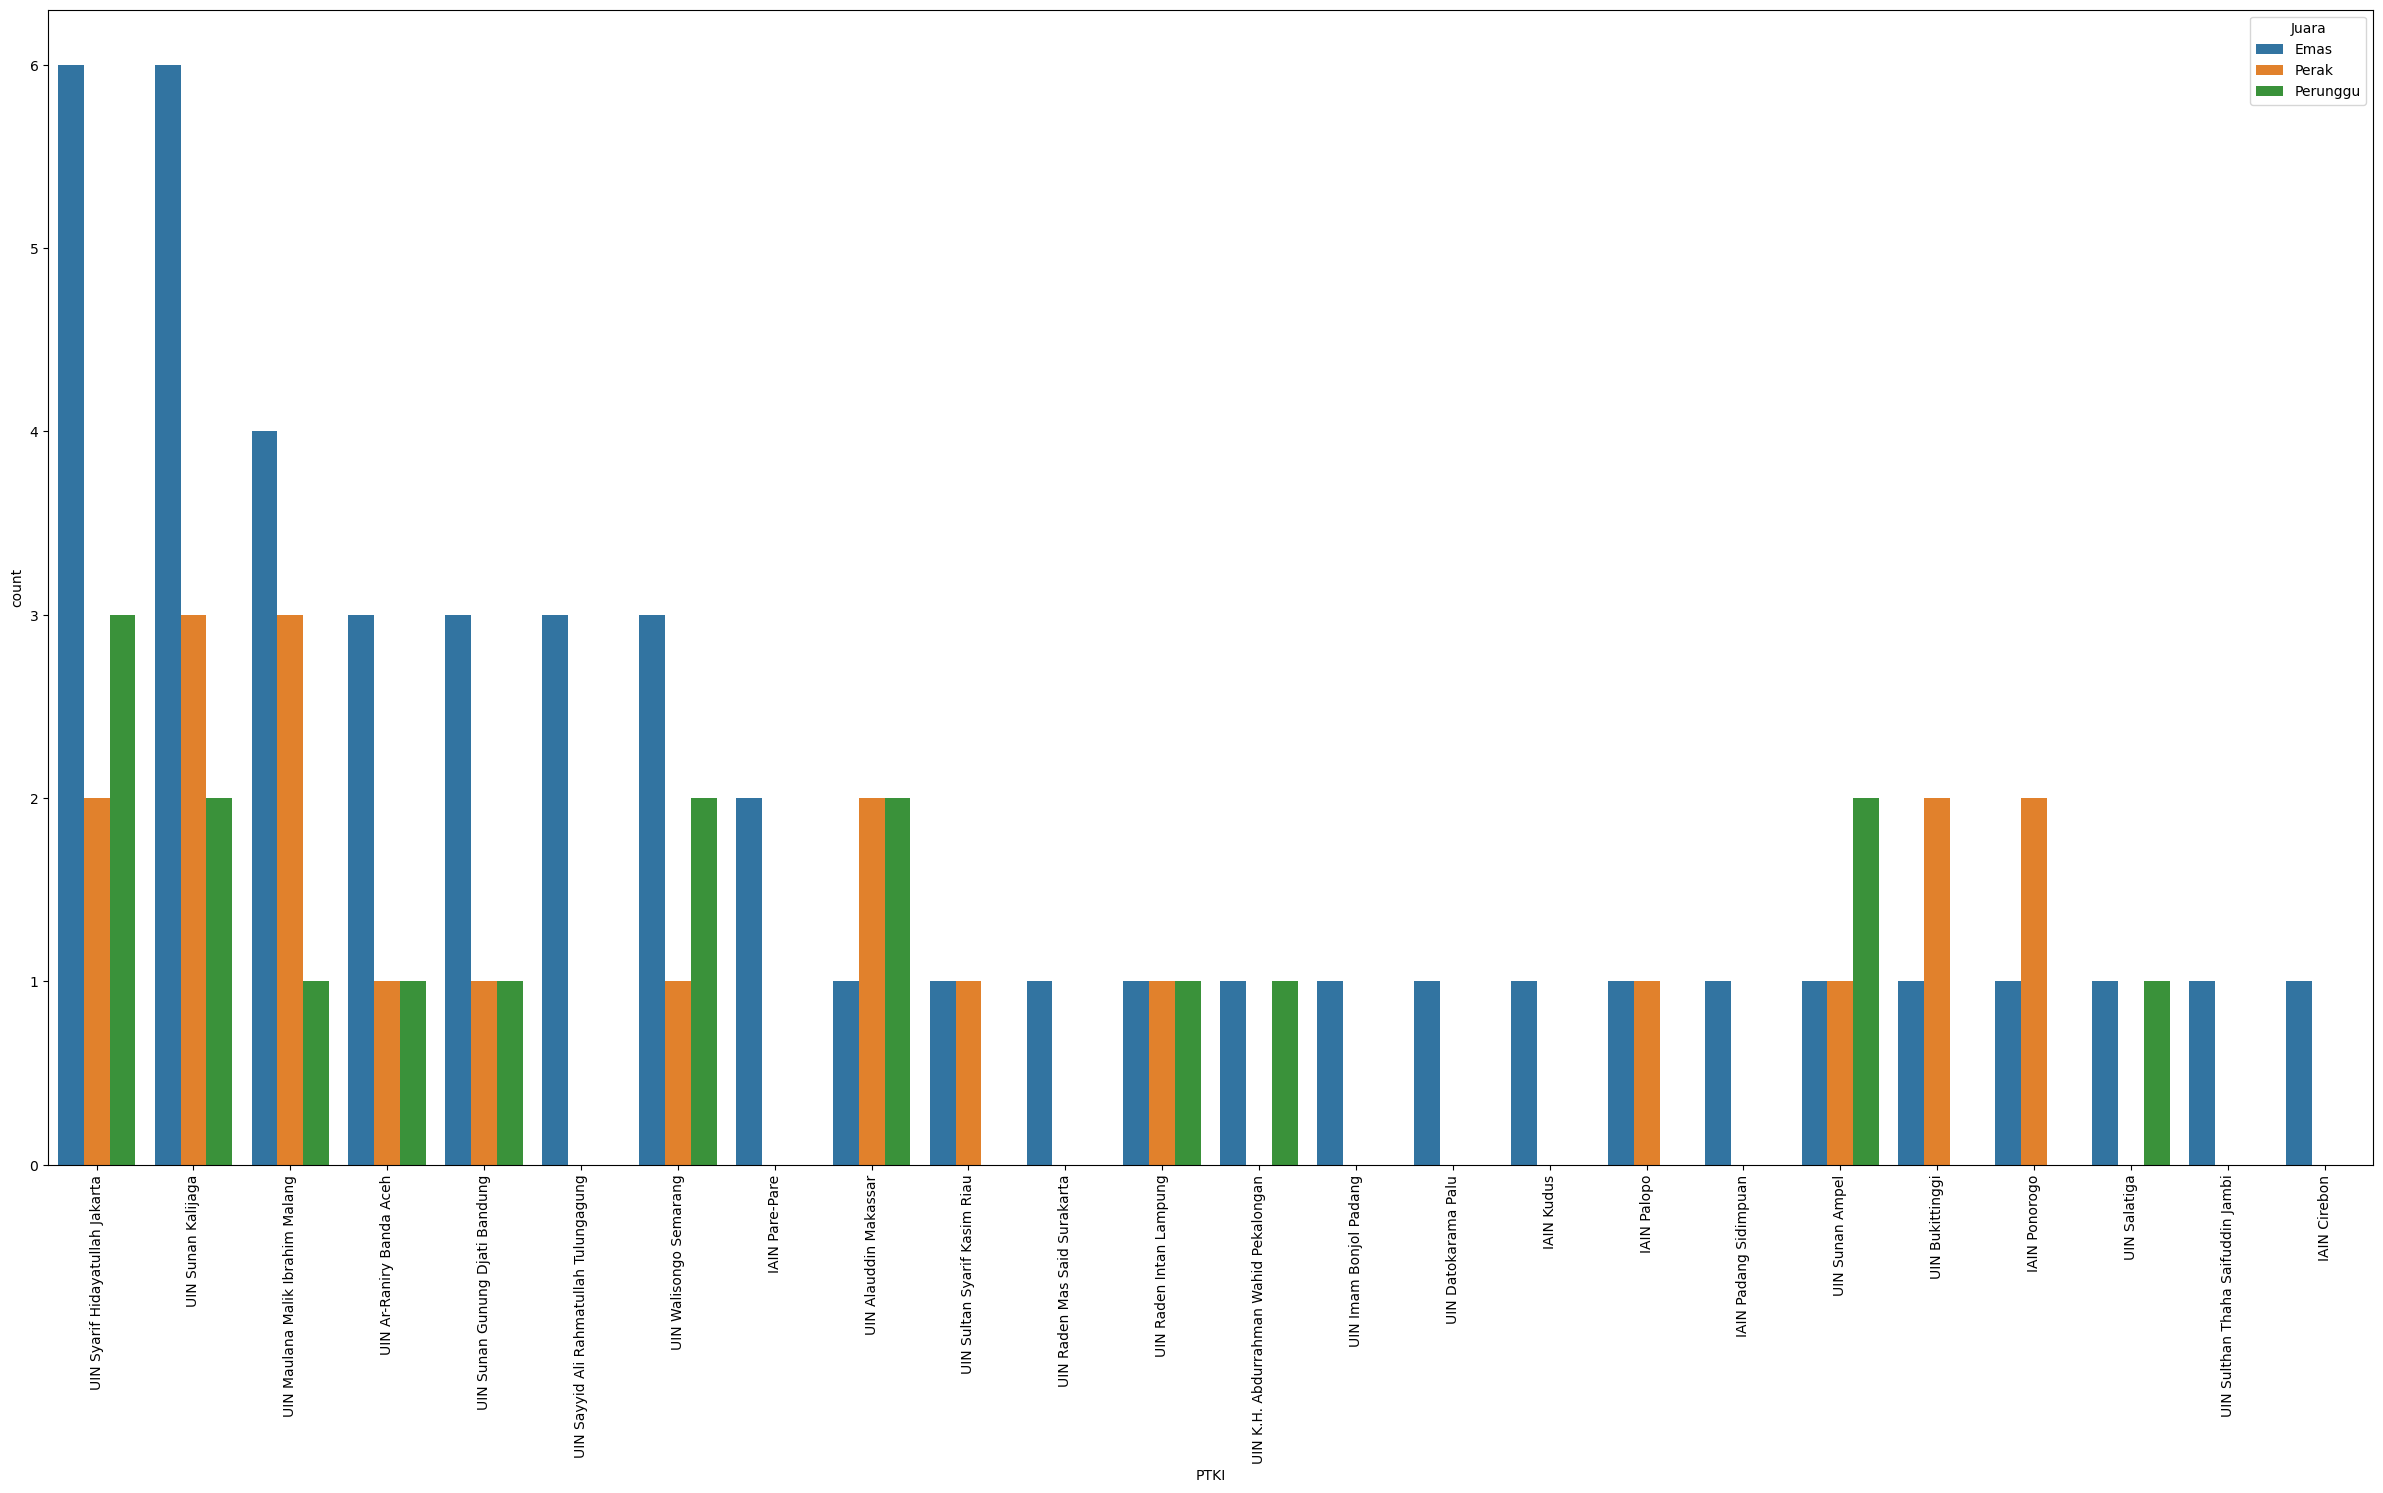

In [7]:
dBest = df_juara[df_juara.Juara.isin(['Emas', 'Perak', 'Perunggu'])]
dBest1 = df_juara[df_juara.Juara.isin(['Emas'])]
plt.figure(figsize=(30,15))
ax = sns.countplot(data=dBest, x="PTKI", hue="Juara", order=dBest1['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [8]:
colOrder = 'Emas,Perak,Perunggu,Juara 04,Juara 05,Juara 06'.split(',')
ct = pd.crosstab(df_juara.PTKI, df_juara.Juara)[colOrder] # correct order
ct.sort_values(colOrder, ascending=[False]*6, inplace=True)
ct['Skor'] = 6*ct['Emas']+5*ct['Perak']+4*ct['Perunggu']+3*ct['Juara 04']+2*ct['Juara 05']+1*ct['Juara 06']
ct.to_csv('data/crosstab-NonExpo-OASE-2023.csv')
ct

Juara,Emas,Perak,Perunggu,Juara 04,Juara 05,Juara 06,Skor
PTKI,,,,,,,
UIN Sunan Kalijaga,6,3,2,2,2,0,69
UIN Syarif Hidayatullah Jakarta,6,2,3,0,3,2,66
UIN Maulana Malik Ibrahim Malang,4,3,1,5,3,0,64
UIN Walisongo Semarang,3,1,2,0,2,1,36
UIN Ar-Raniry Banda Aceh,3,1,1,1,1,2,34
UIN Sunan Gunung Djati Bandung,3,1,1,0,1,1,30
UIN Sayyid Ali Rahmatullah Tulungagung,3,0,0,0,1,0,20
IAIN Pare-Pare,2,0,0,0,1,0,14
UIN Alauddin Makassar,1,2,2,0,4,0,32


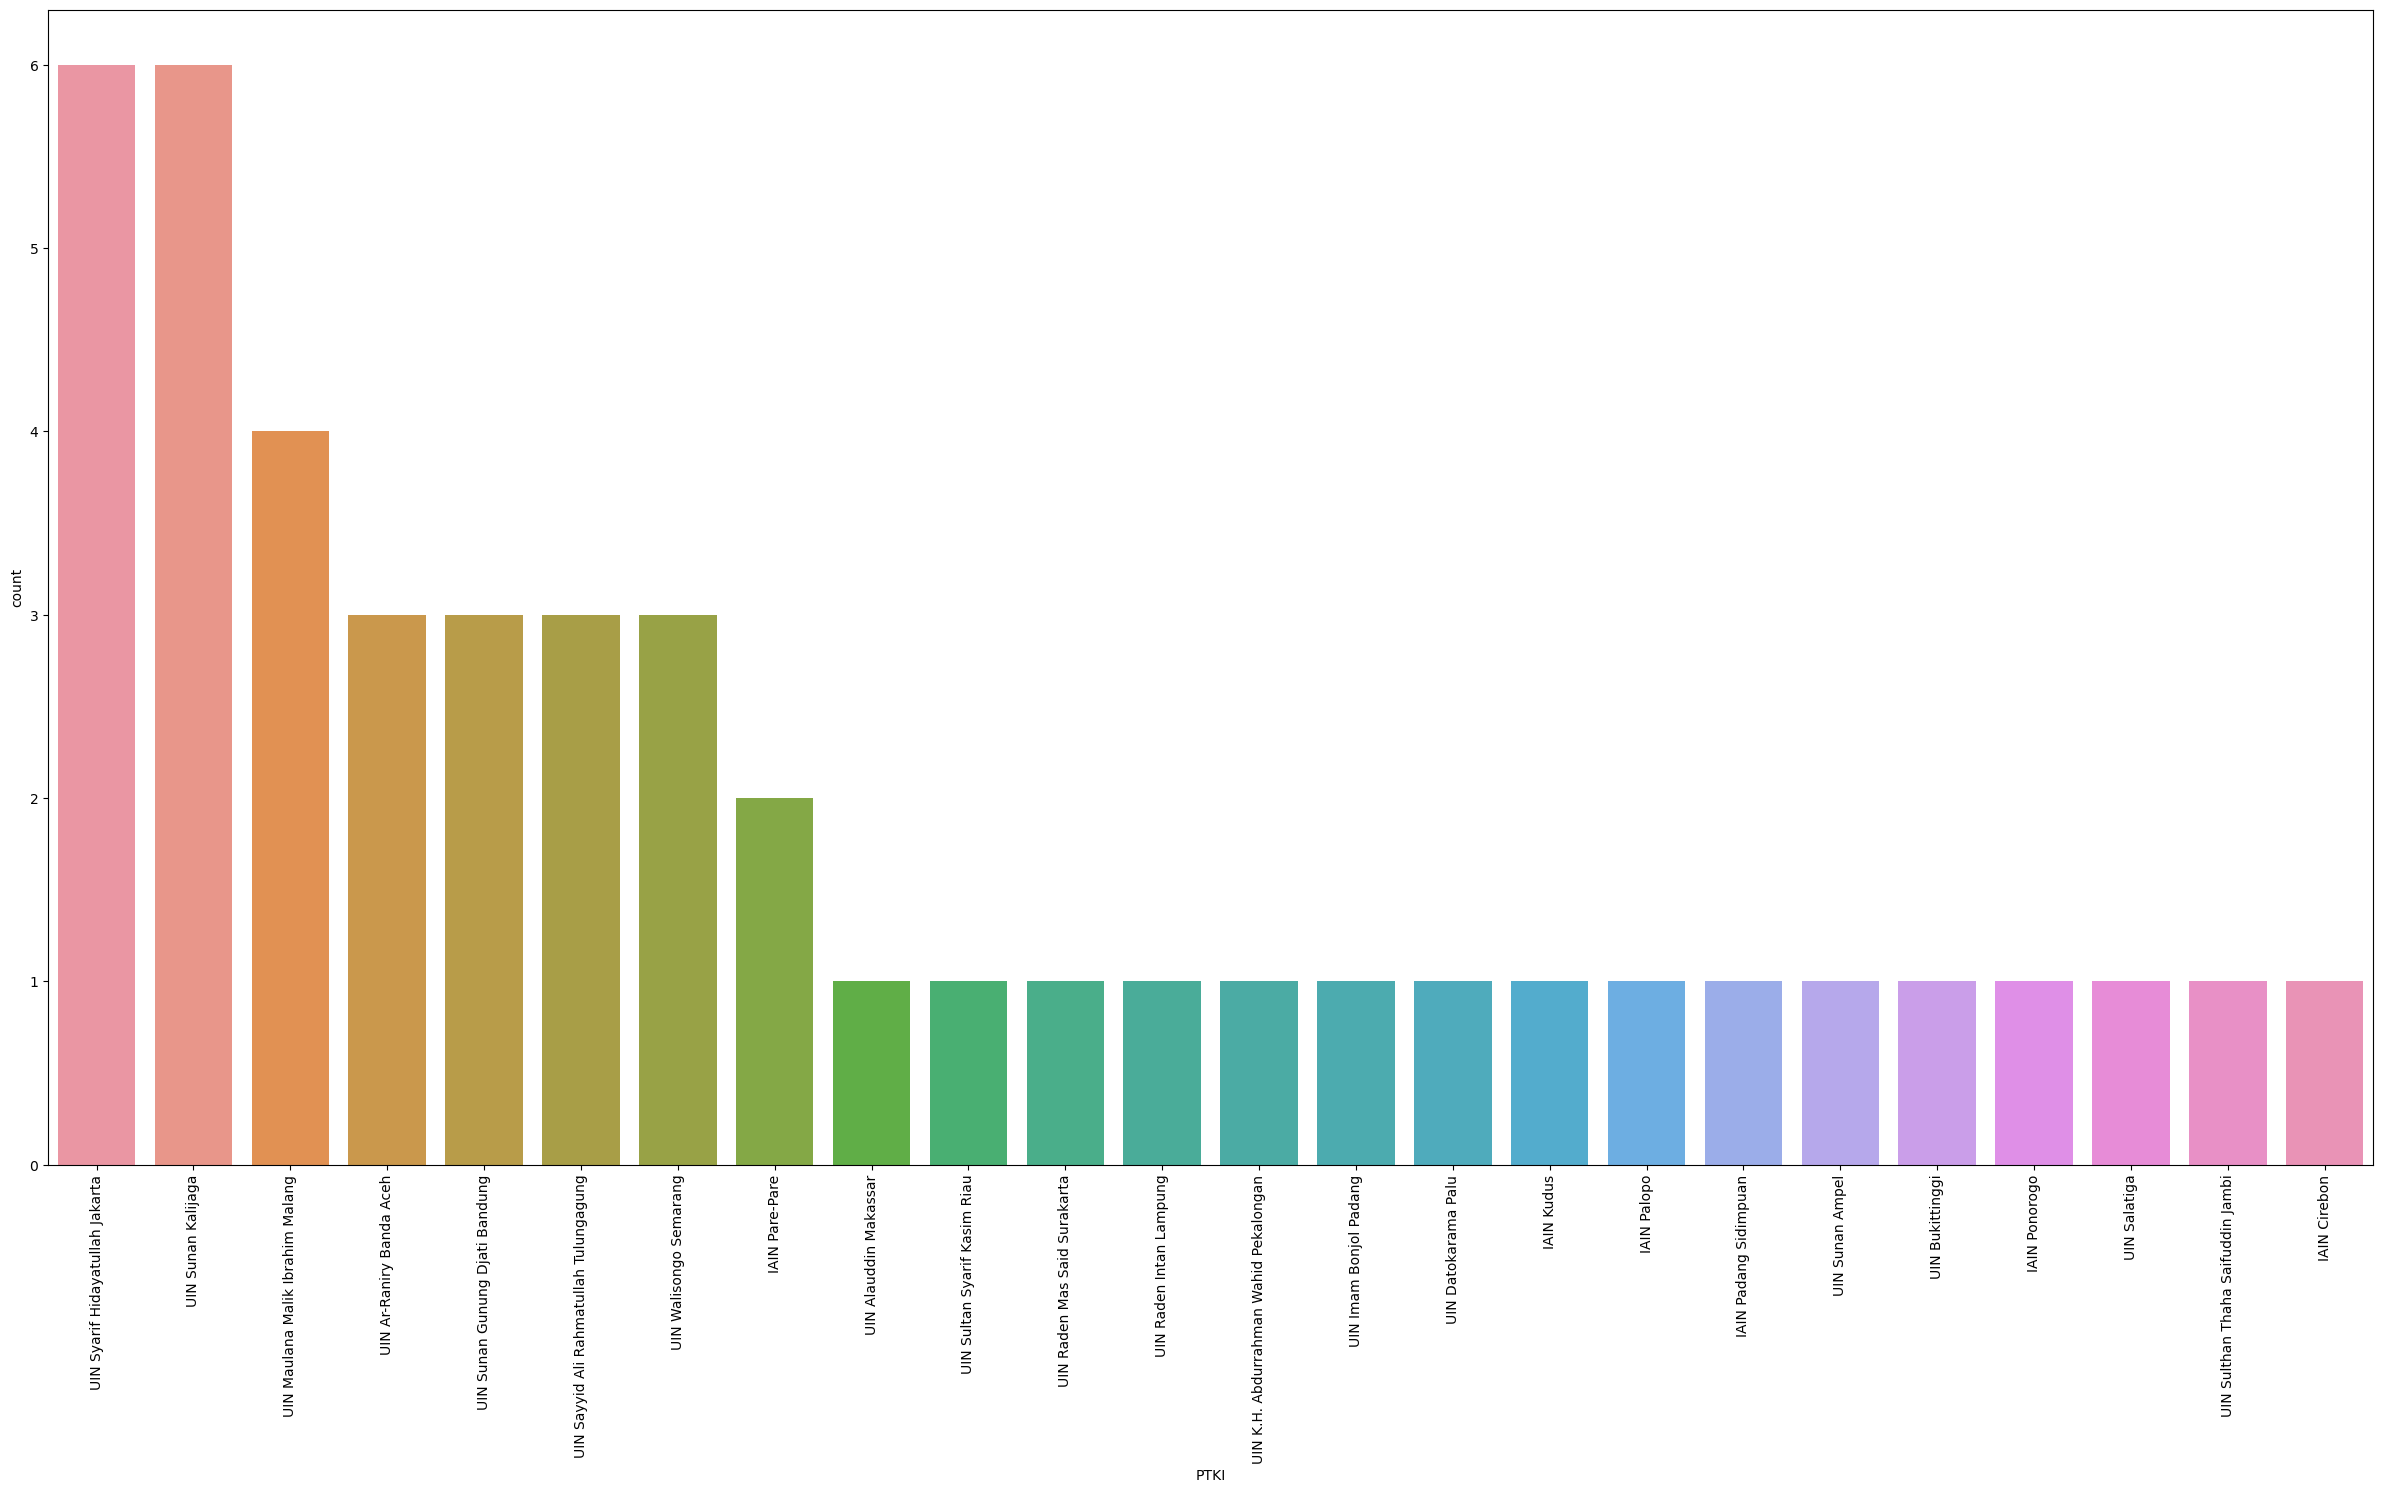

In [9]:
emas = df_juara[df_juara.Juara.isin(['Emas'])]
plt.figure(figsize=(30,15))
ax = sns.countplot(data=emas, x="PTKI", order=emas['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

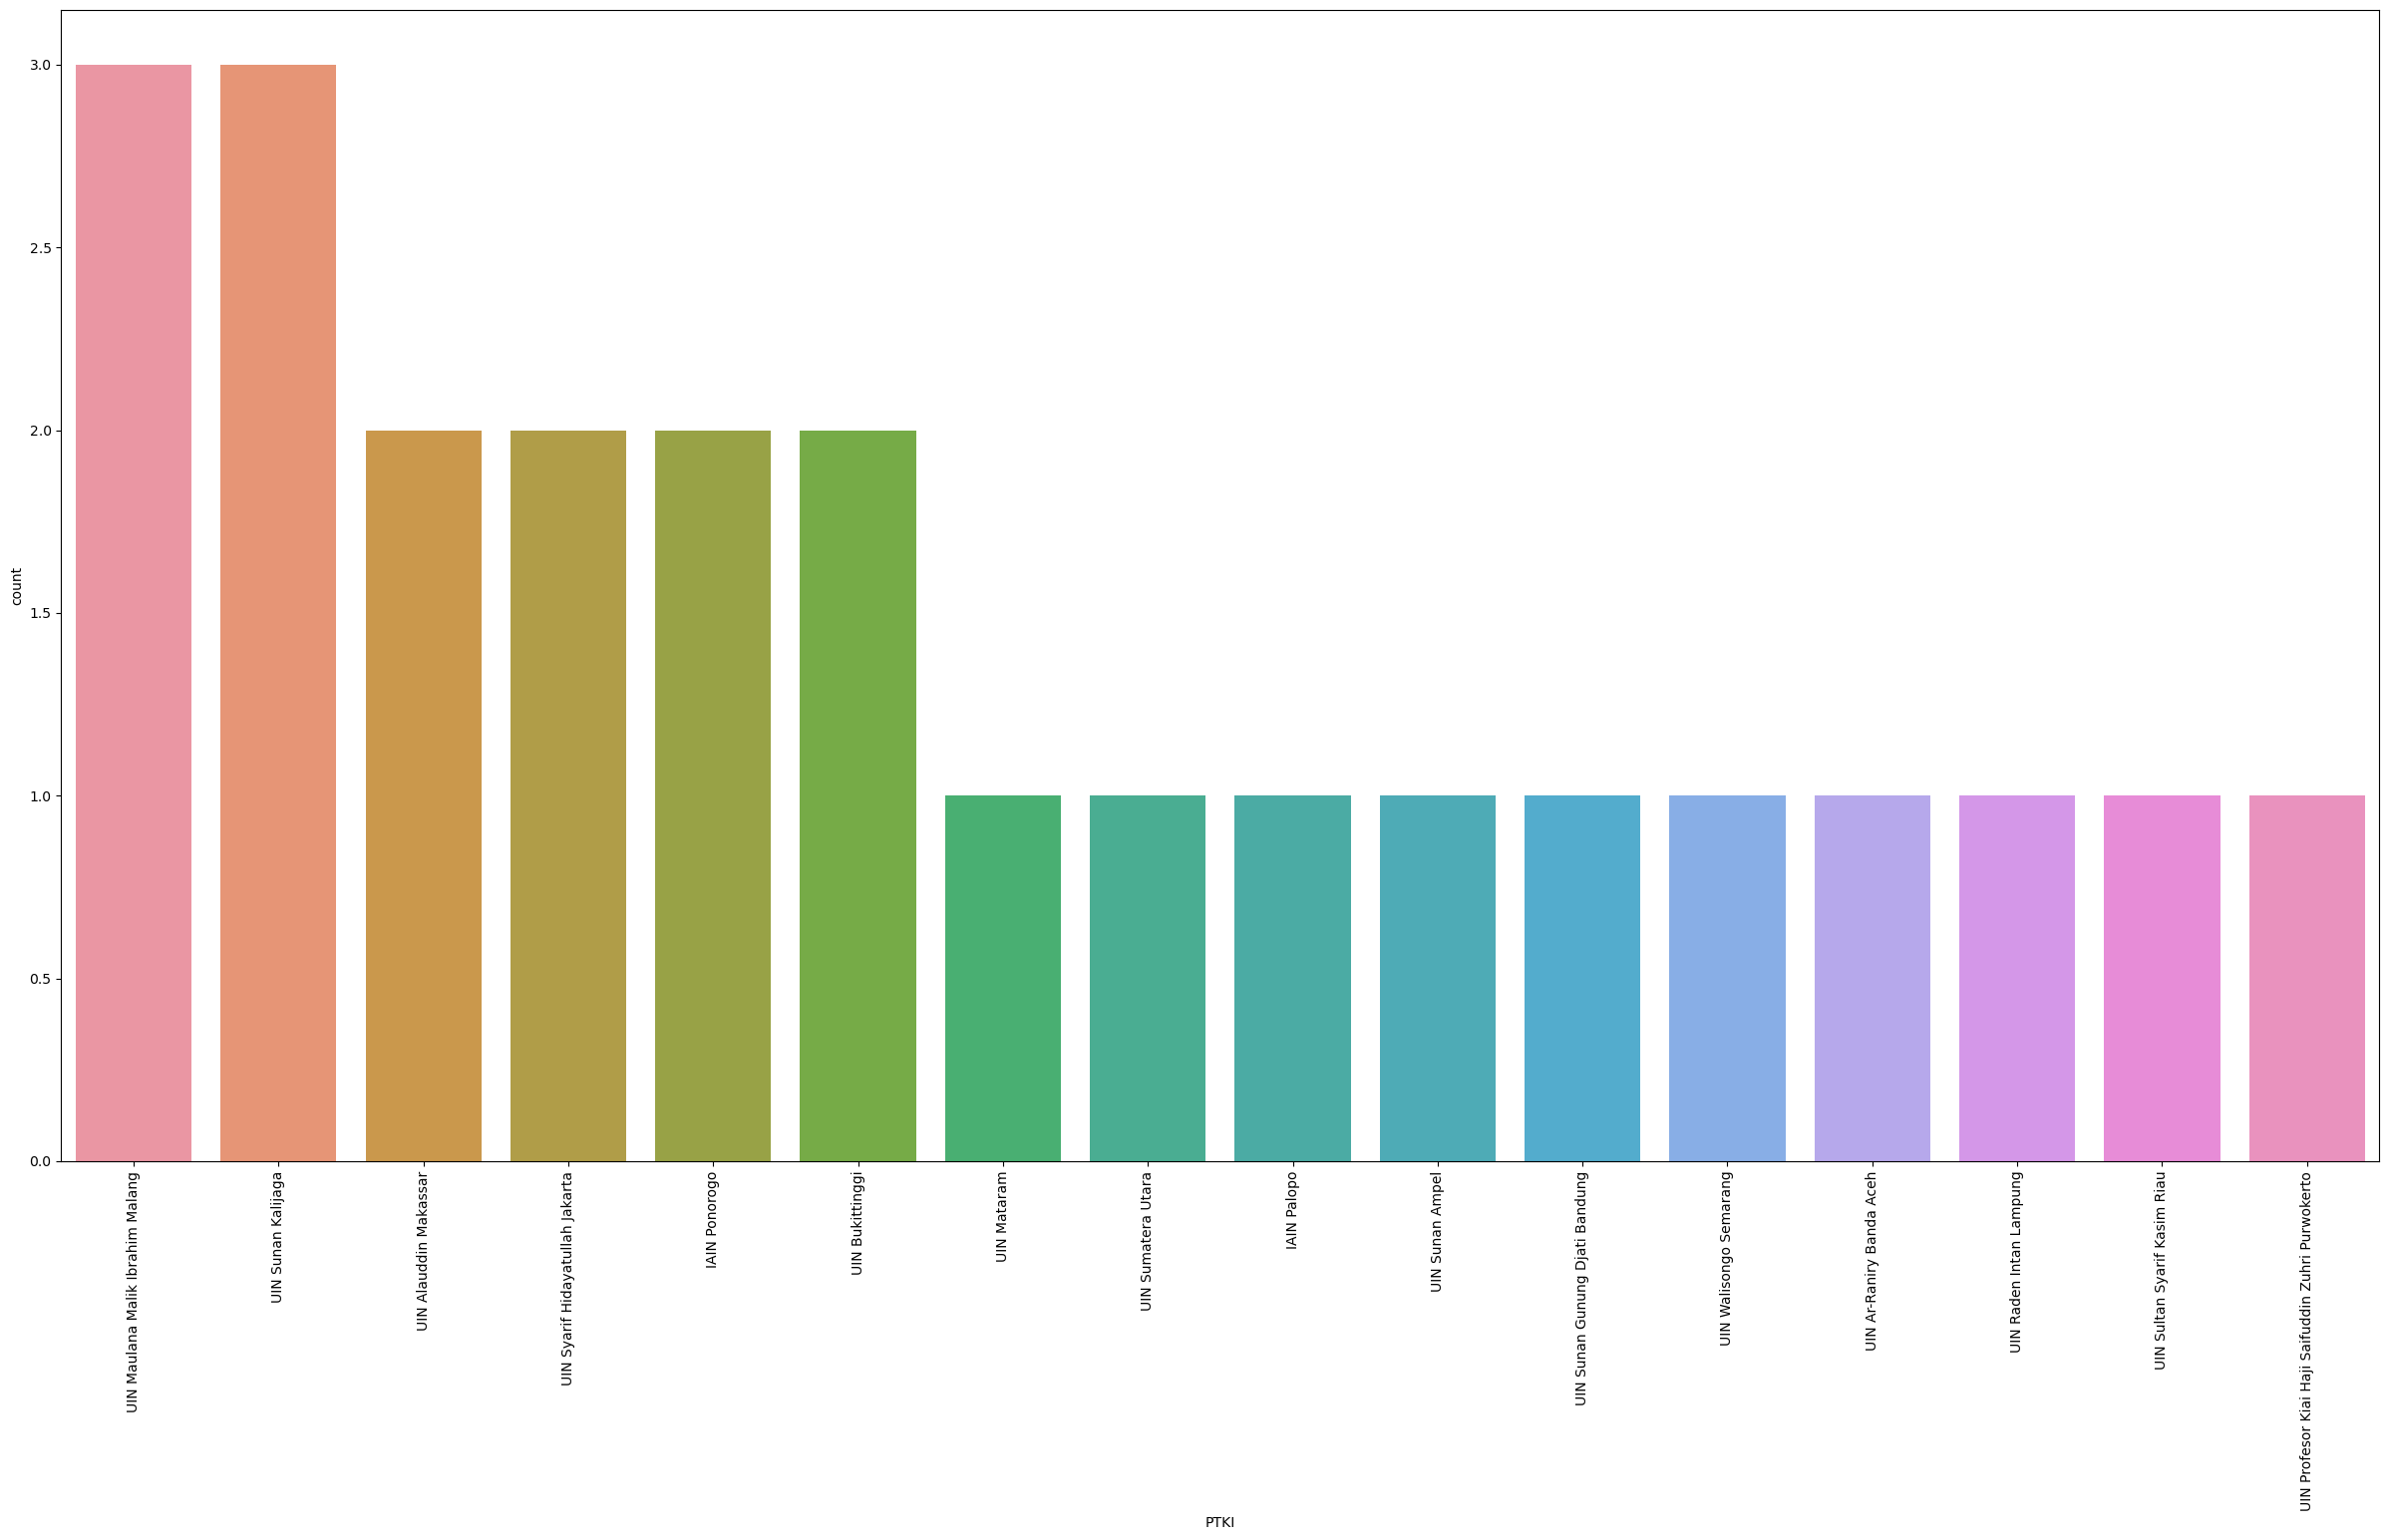

In [10]:
perak = df_juara[df_juara.Juara.isin(['Perak'])]
plt.figure(figsize=(30,15))
ax = sns.countplot(data=perak, x="PTKI", order=perak['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

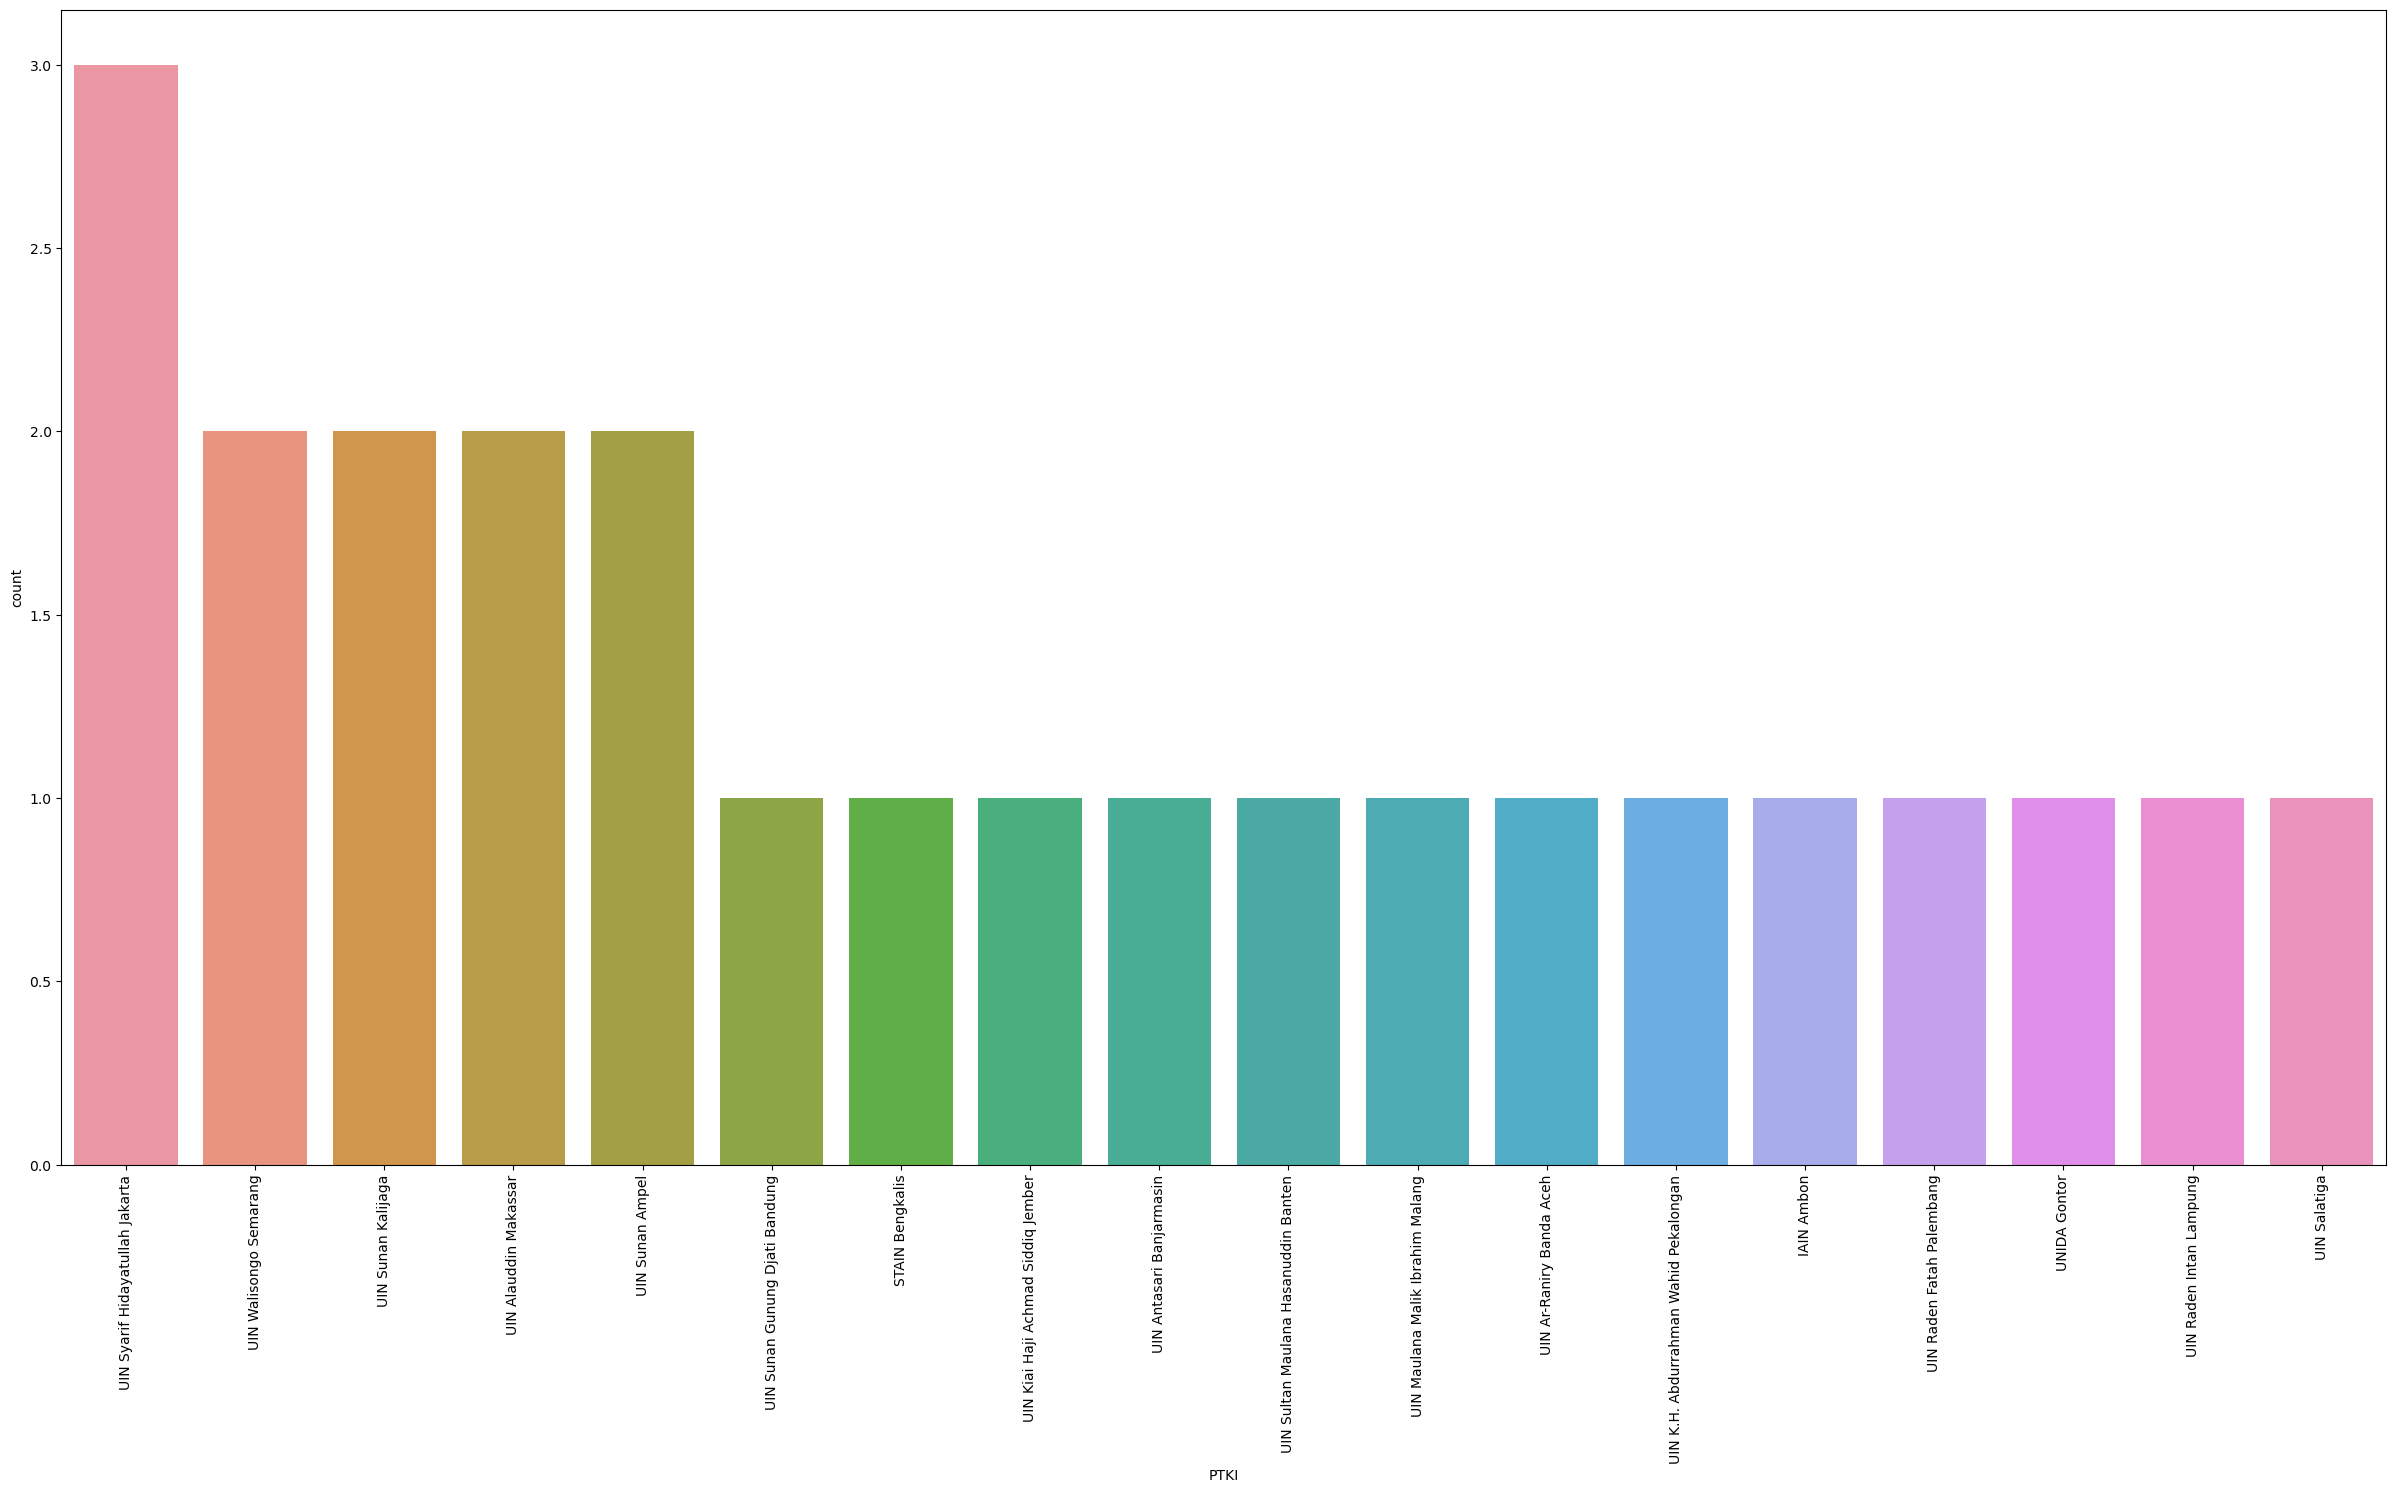

In [11]:
Perunggu = df_juara[df_juara.Juara.isin(['Perunggu'])]
plt.figure(figsize=(30,15))
ax = sns.countplot(data=Perunggu, x="PTKI", order=Perunggu['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [12]:
fName = 'data/rekap_juara_expo_oase_2023.csv'
df = pd.read_csv(fName)
for i, d in df.iterrows():
    df.loc[i,'Lomba'] = "Expo " + d.Lomba
df.head()

,Lomba,PTKI,Nilai,Juara
0,Expo Robotik,UIN Syarif Hidayatullah Jakarta,92.5,Emas
1,Expo Robotik,UIN Sunan Gunung Djati Bandung,80.0,Perak
2,Expo Robotik,UIN Sunan Kalijaga,76.4,Perunggu
3,Expo Nanoteknologi,IAIN Ponorogo,95.0,Emas
4,Expo Nanoteknologi,UIN Alauddin Makassar,90.0,Perak


In [13]:
colOrder = 'Emas,Perak,Perunggu'.split(',')
ct = pd.crosstab(df.PTKI, df.Juara)[colOrder] # correct order
ct.sort_values(colOrder, ascending=[False]*3, inplace=True)
ct.to_csv('data/crosstab-Expo-OASE-2023.csv')
ct

Juara,Emas,Perak,Perunggu
PTKI,,,
UIN Syarif Hidayatullah Jakarta,2,1,0
UIN Salatiga,2,0,0
UIN Sunan Kalijaga,1,1,2
UIN Sunan Gunung Djati Bandung,1,1,0
UIN Walisongo Semarang,1,0,2
IAIN Ponorogo,1,0,0
IAIN Syaikh Abdurrahman Siddik Bangka Belitung,1,0,0
UIN Raden Intan Lampung,1,0,0
UIN Alauddin Makassar,0,3,0


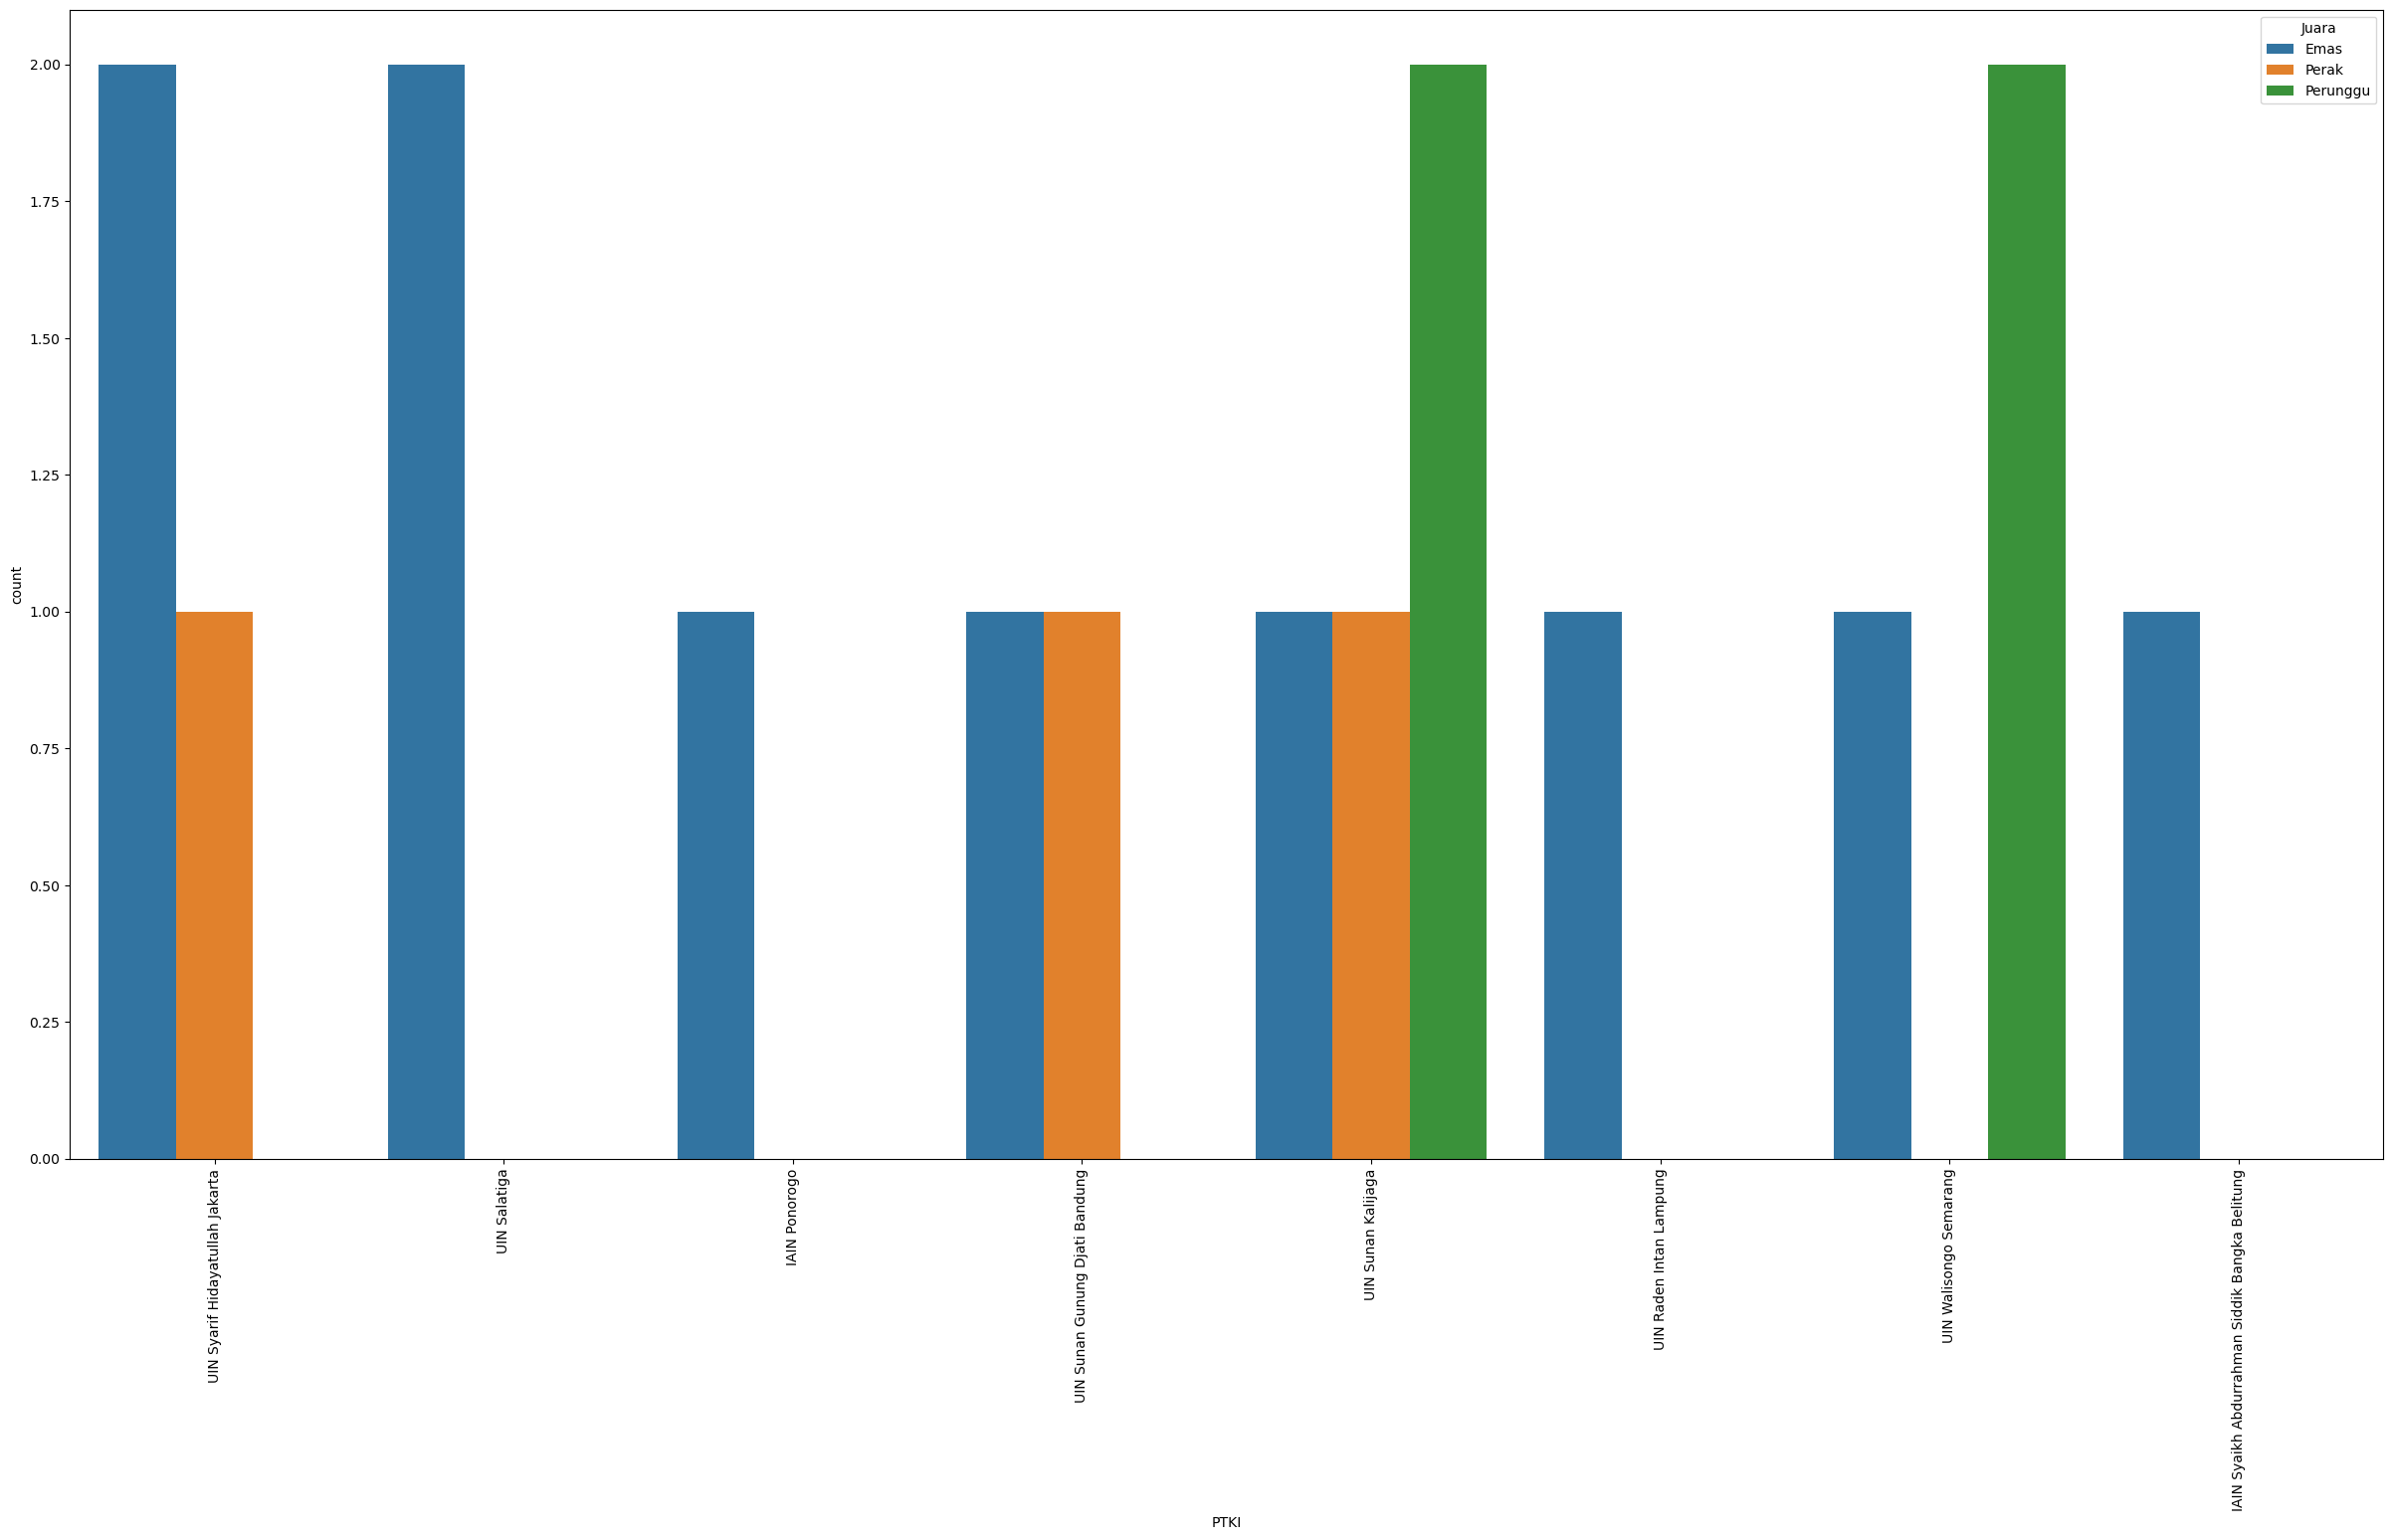

In [14]:
dBest = df[df.Juara.isin(['Emas'])]
plt.figure(figsize=(30,15))
ax = sns.countplot(data=df, x="PTKI", hue="Juara", order=dBest['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [15]:
col = 'Lomba PTKI Juara'.split()
dfJoined = pd.concat([df_juara[col], df[col]], ignore_index = True)
dfJoined.head()

,Lomba,PTKI,Juara
0,Arsitektur,UIN Ar-Raniry Banda Aceh,Emas
1,Arsitektur,UIN Alauddin Makassar,Perak
2,Arsitektur,UIN Walisongo Semarang,Perunggu
3,Arsitektur,UIN Maulana Malik Ibrahim Malang,Juara 04
4,Arsitektur,UIN Maulana Malik Ibrahim Malang,Juara 05


In [16]:
colOrder = 'Emas,Perak,Perunggu,Juara 04,Juara 05,Juara 06'.split(',')
ct = pd.crosstab(dfJoined.PTKI, dfJoined.Juara)[colOrder] # correct order
ct.sort_values(colOrder, ascending=[False]*6, inplace=True)
ct['Skor'] = 6*ct['Emas']+5*ct['Perak']+4*ct['Perunggu']+3*ct['Juara 04']+2*ct['Juara 05']+1*ct['Juara 06']
ct.to_csv('data/crosstab-AllLomba-OASE-2023.csv')
ct

Juara,Emas,Perak,Perunggu,Juara 04,Juara 05,Juara 06,Skor
PTKI,,,,,,,
UIN Syarif Hidayatullah Jakarta,8,3,3,0,3,2,83
UIN Sunan Kalijaga,7,4,4,2,2,0,88
UIN Maulana Malik Ibrahim Malang,4,3,2,5,3,0,68
UIN Sunan Gunung Djati Bandung,4,2,1,0,1,1,41
UIN Walisongo Semarang,4,1,4,0,2,1,50
UIN Ar-Raniry Banda Aceh,3,1,1,1,1,2,34
UIN Sayyid Ali Rahmatullah Tulungagung,3,1,0,0,1,0,25
UIN Salatiga,3,0,1,0,0,0,22
IAIN Ponorogo,2,2,0,1,1,1,28


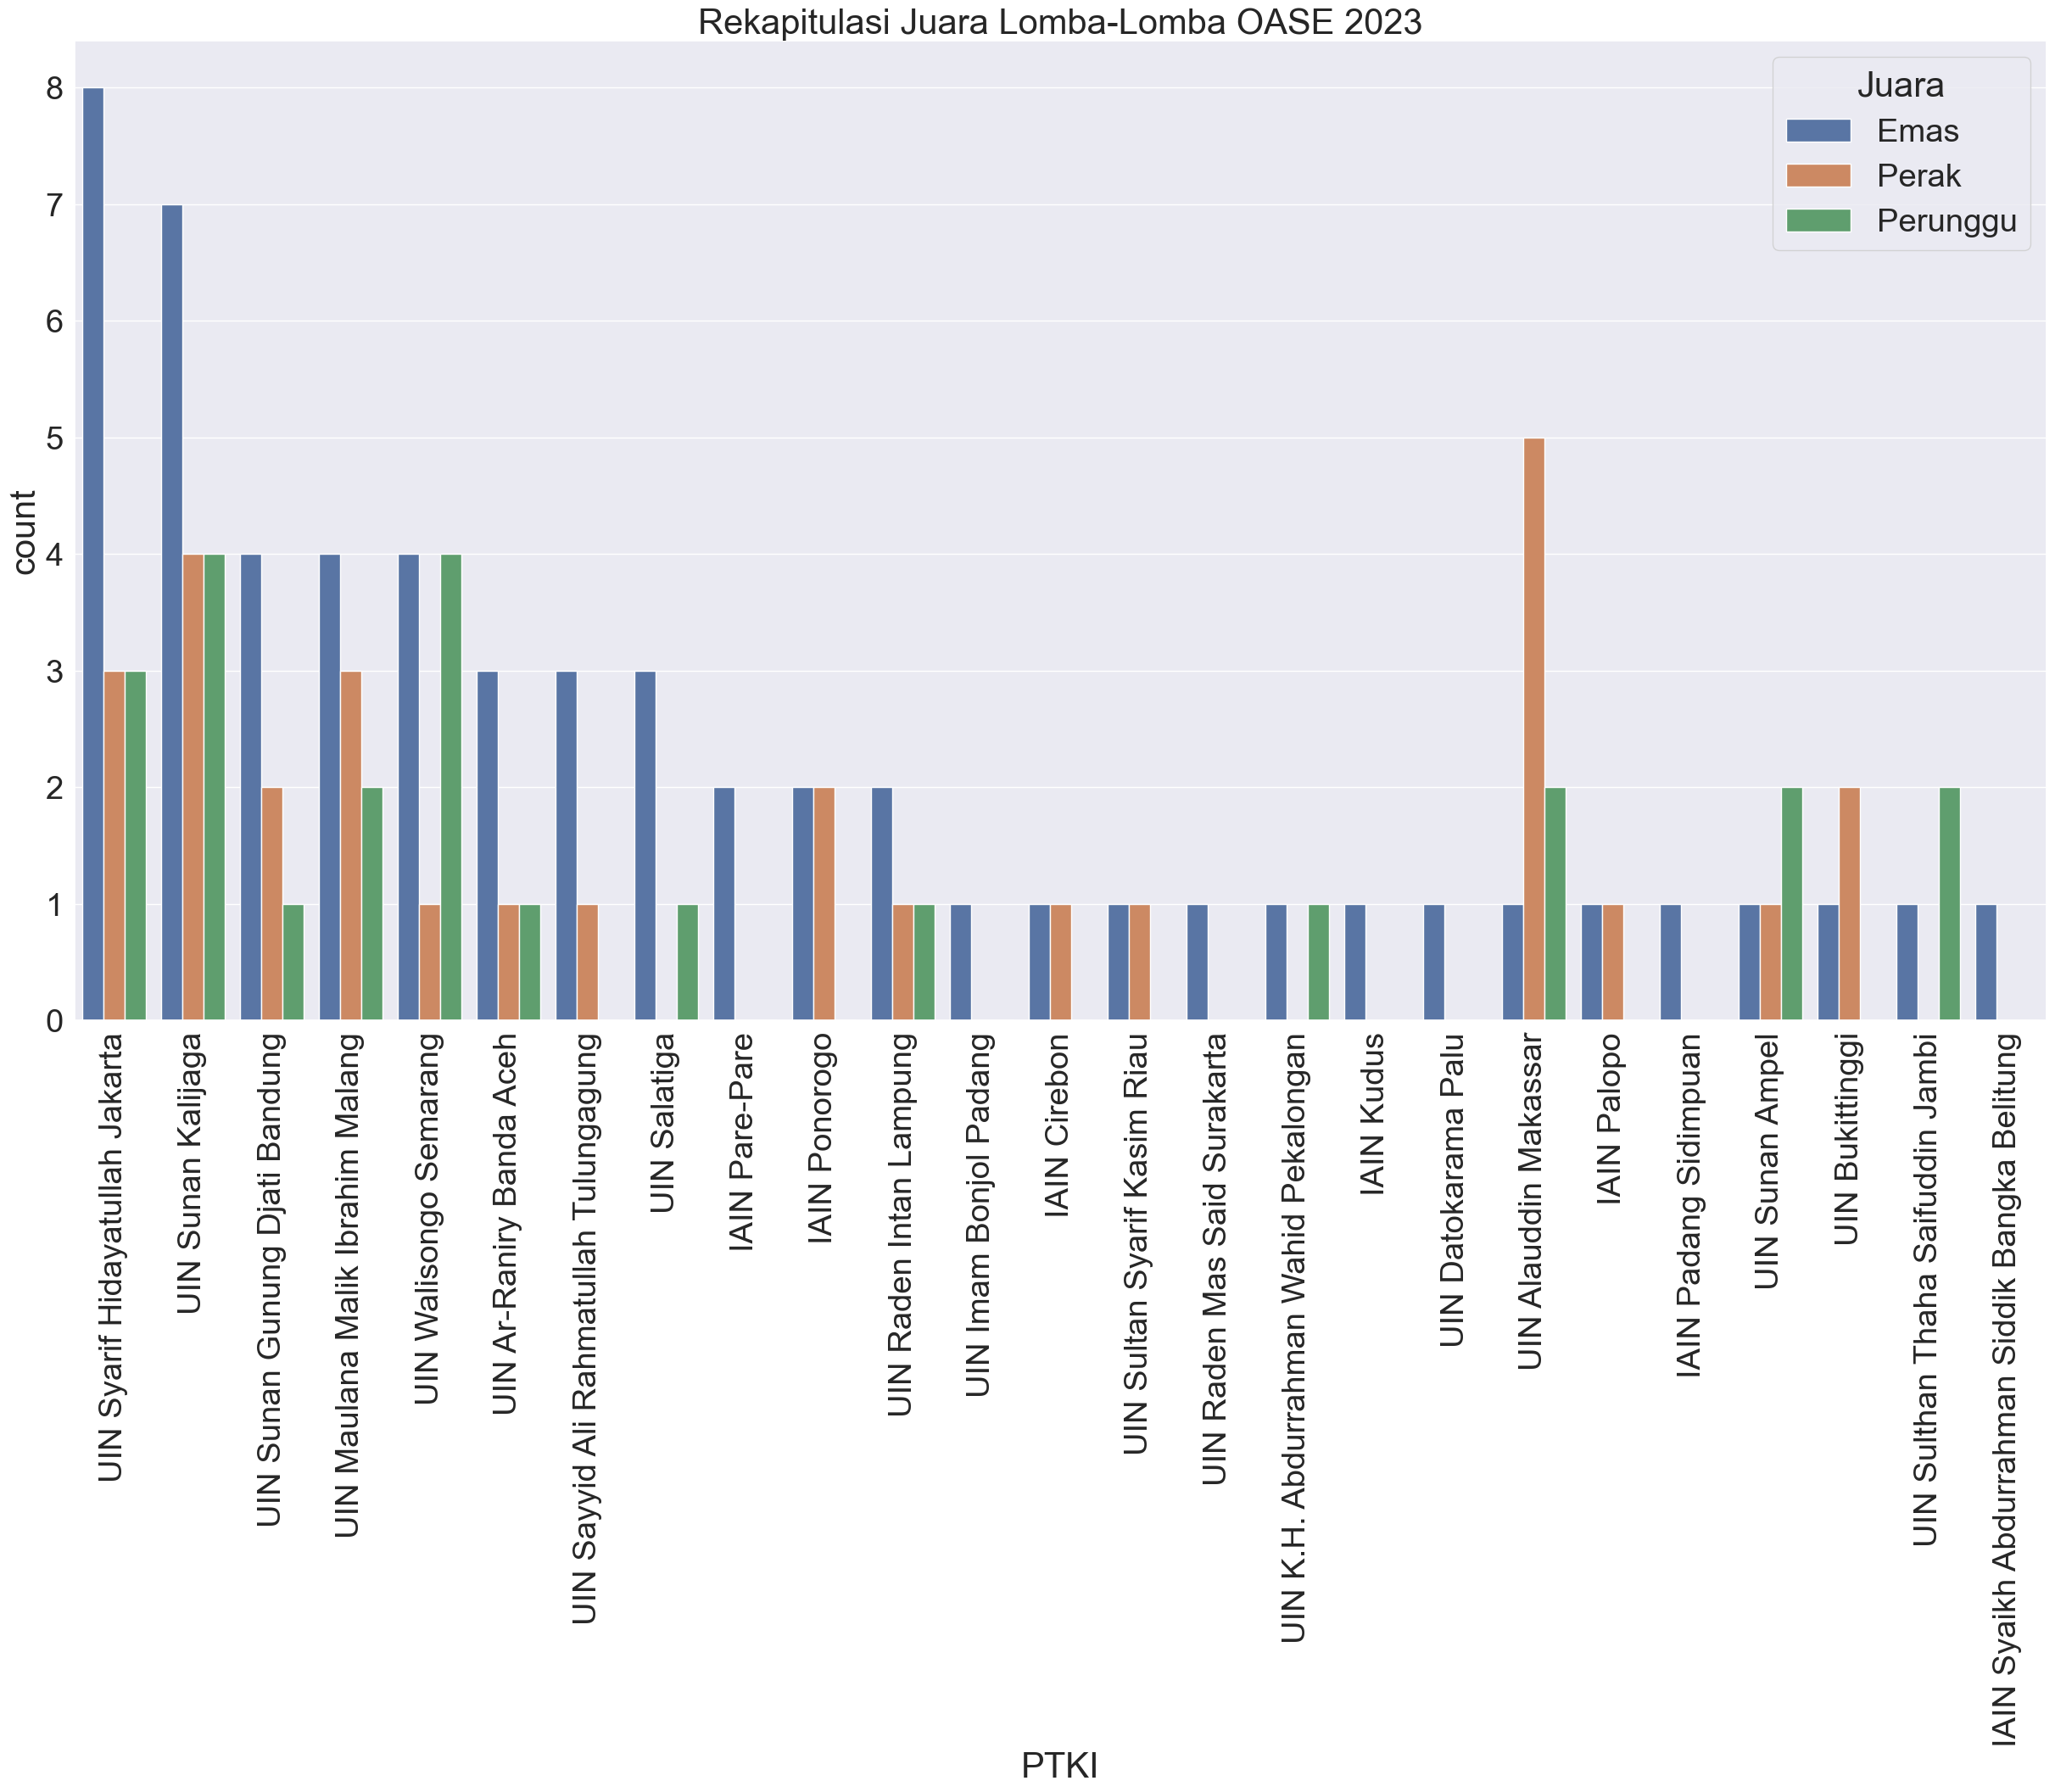

In [17]:
dBest = dfJoined[dfJoined.Juara.isin(['Emas', 'Perak', 'Perunggu'])]
dBest1 = dfJoined[dfJoined.Juara.isin(['Emas'])]
plt.figure(figsize=(30,15))
sns.set(font_scale=2.5)
ax = sns.countplot(data=dBest, x="PTKI", hue="Juara", order=dBest1['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Rekapitulasi Juara Lomba-Lomba OASE 2023")
plt.show()

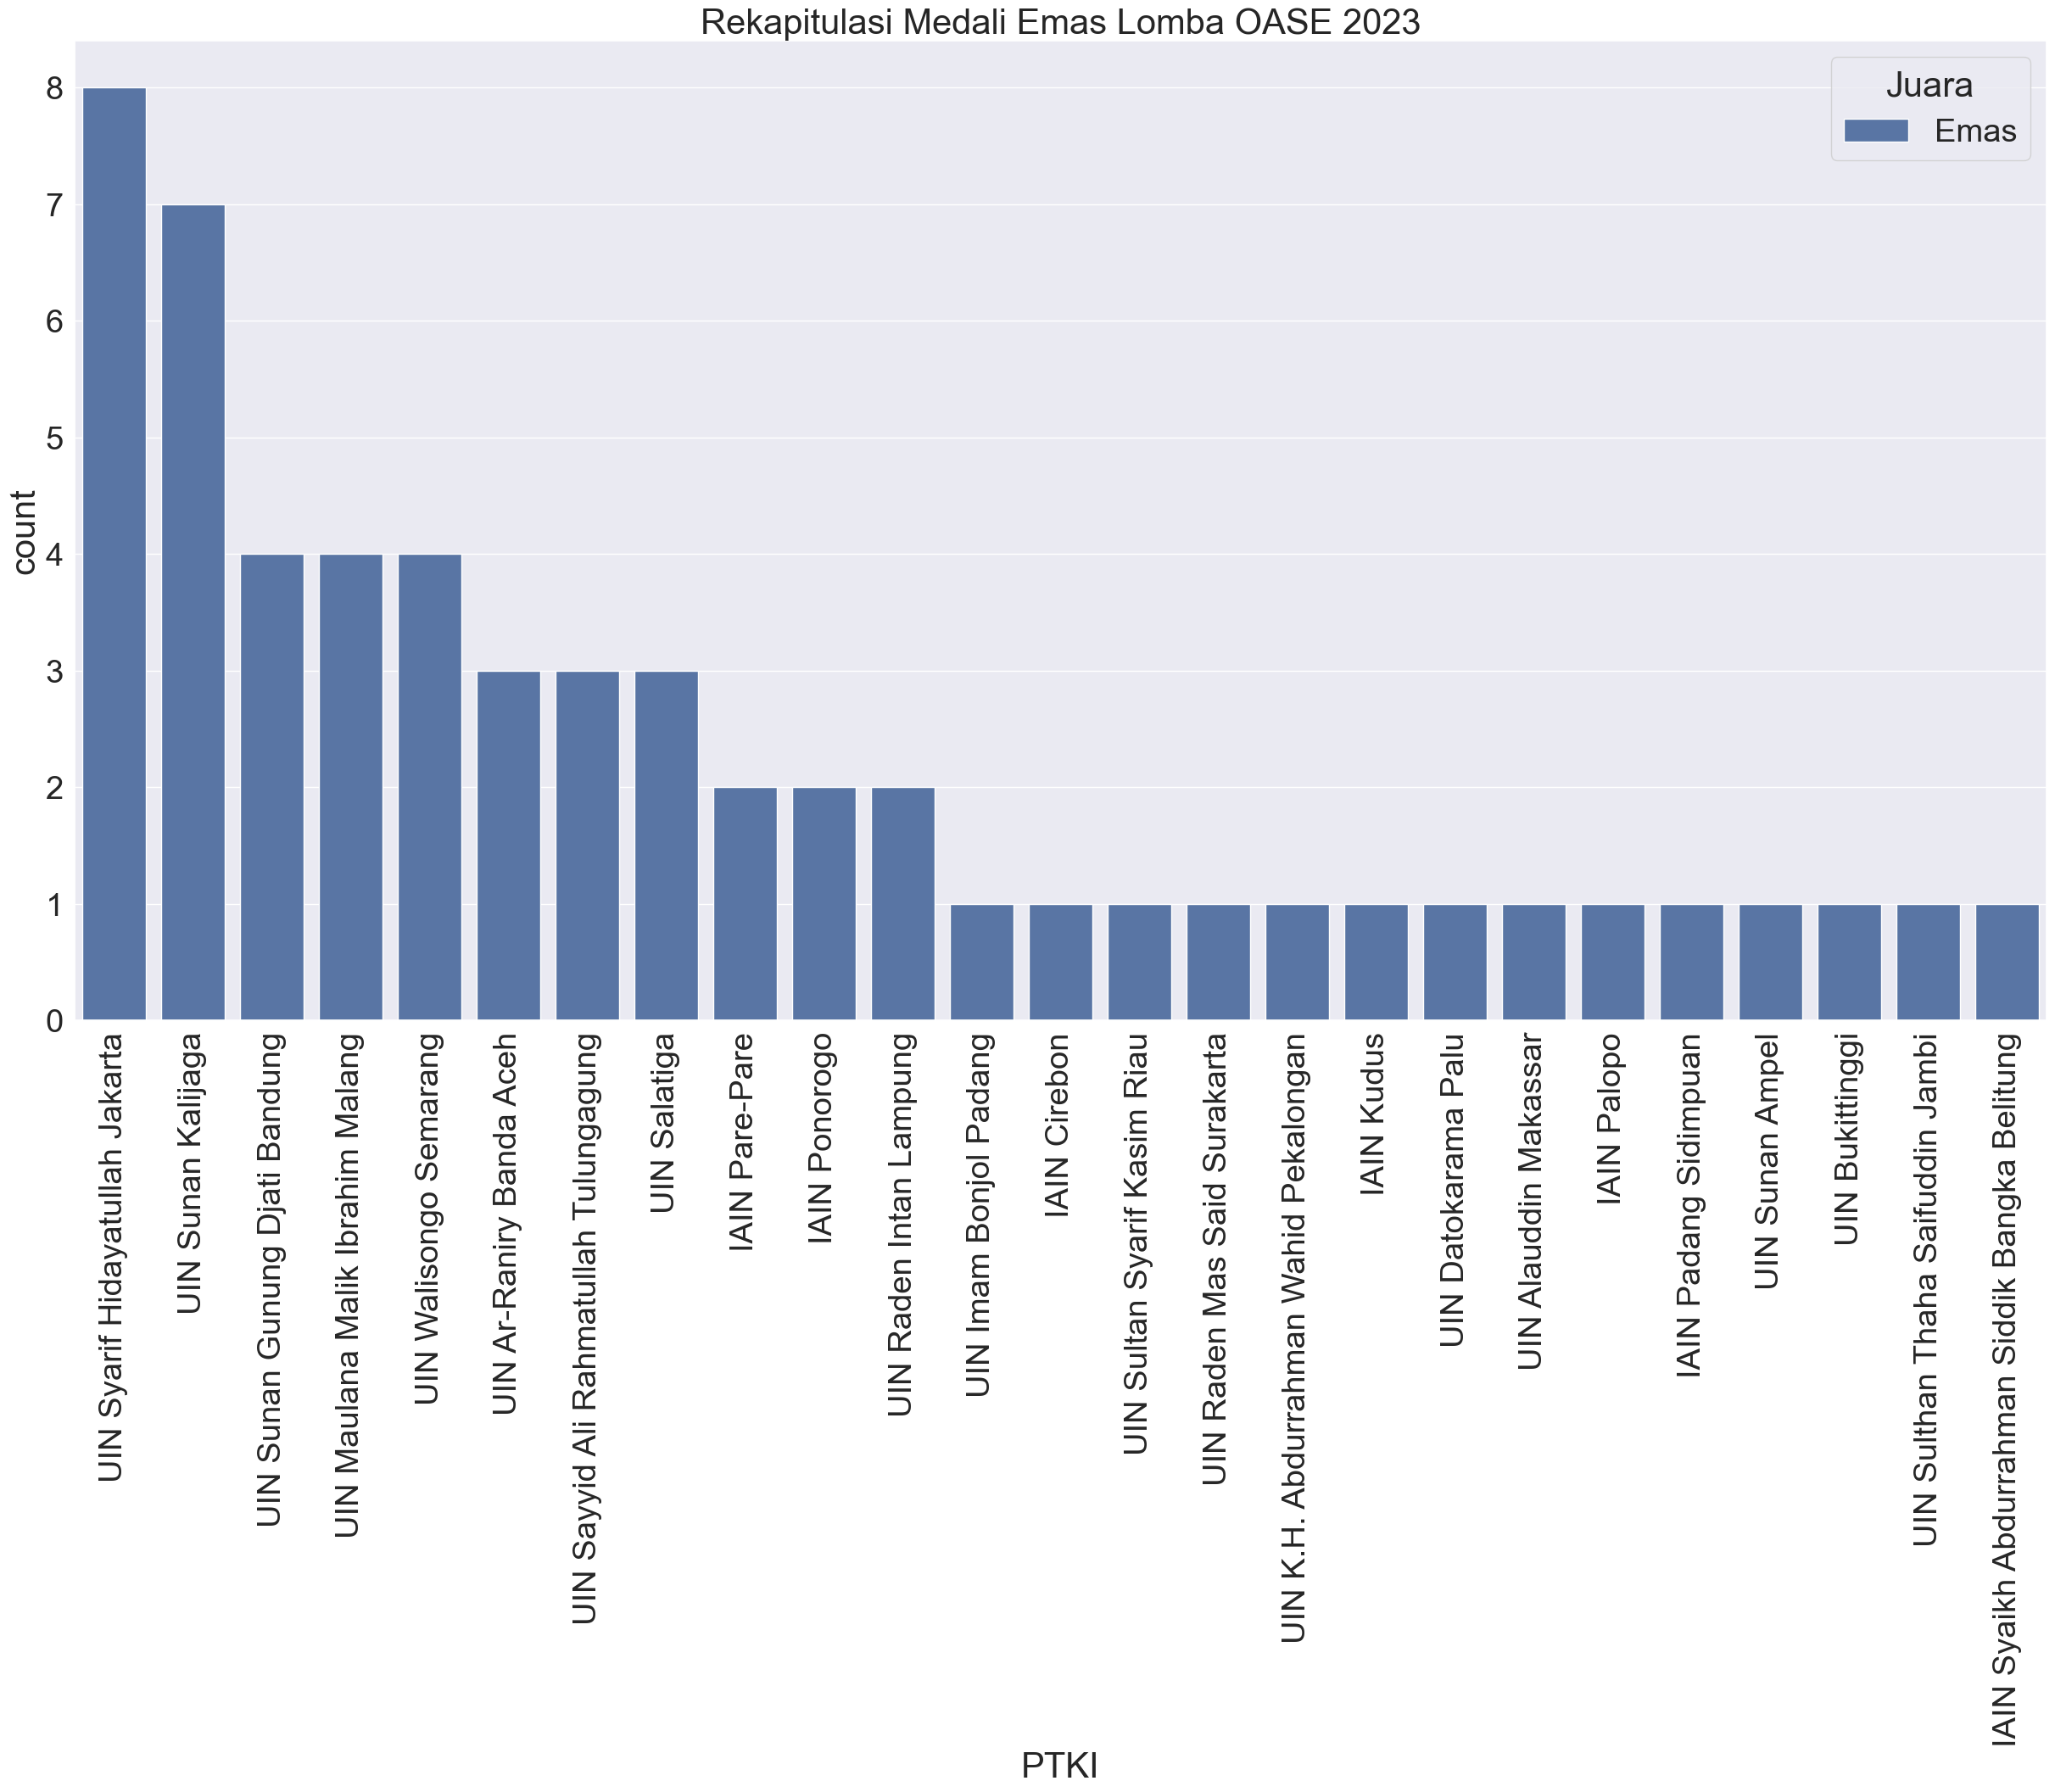

In [18]:
dBest = dfJoined[dfJoined.Juara.isin(['Emas'])]
dBest1 = dfJoined[dfJoined.Juara.isin(['Emas'])]
plt.figure(figsize=(30,15))
sns.set(font_scale=2.5)
ax = sns.countplot(data=dBest, x="PTKI", hue="Juara", order=dBest1['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Rekapitulasi Medali Emas Lomba OASE 2023")
plt.show()

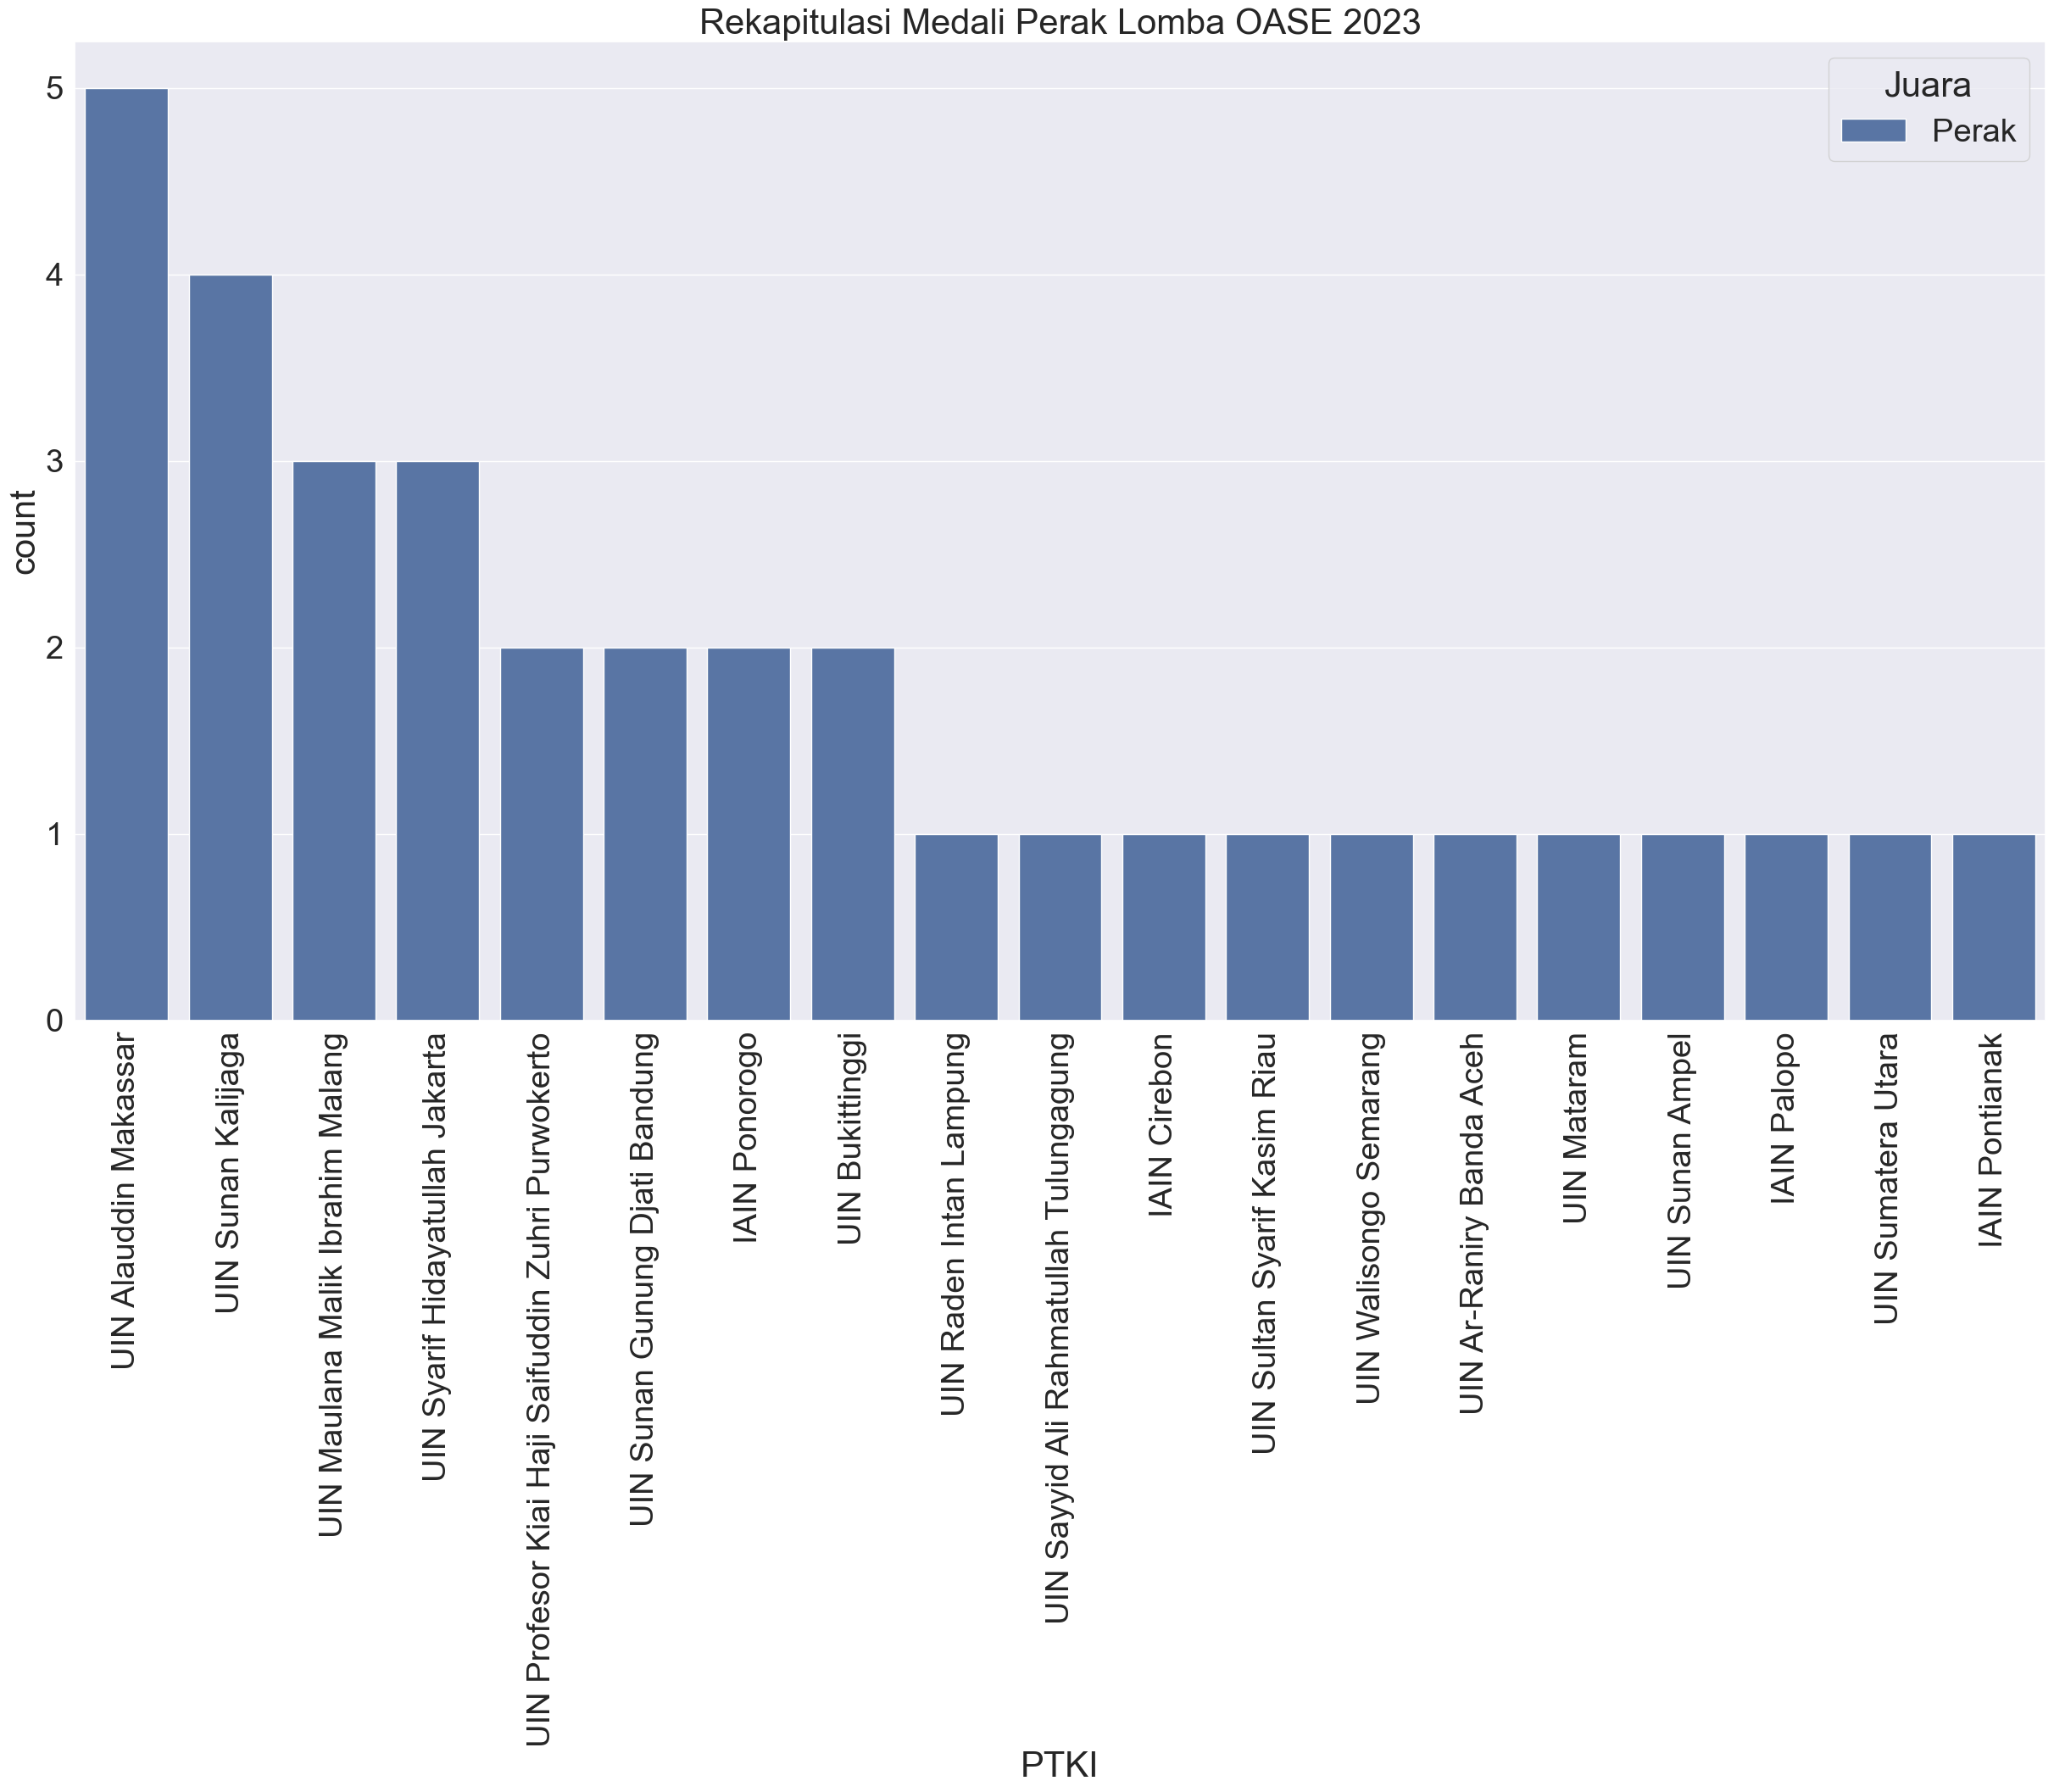

In [19]:
dBest = dfJoined[dfJoined.Juara.isin(['Perak'])]
dBest1 = dfJoined[dfJoined.Juara.isin(['Perak'])]
plt.figure(figsize=(30,15))
sns.set(font_scale=2.5)
ax = sns.countplot(data=dBest, x="PTKI", hue="Juara", order=dBest1['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Rekapitulasi Medali Perak Lomba OASE 2023")
plt.show()

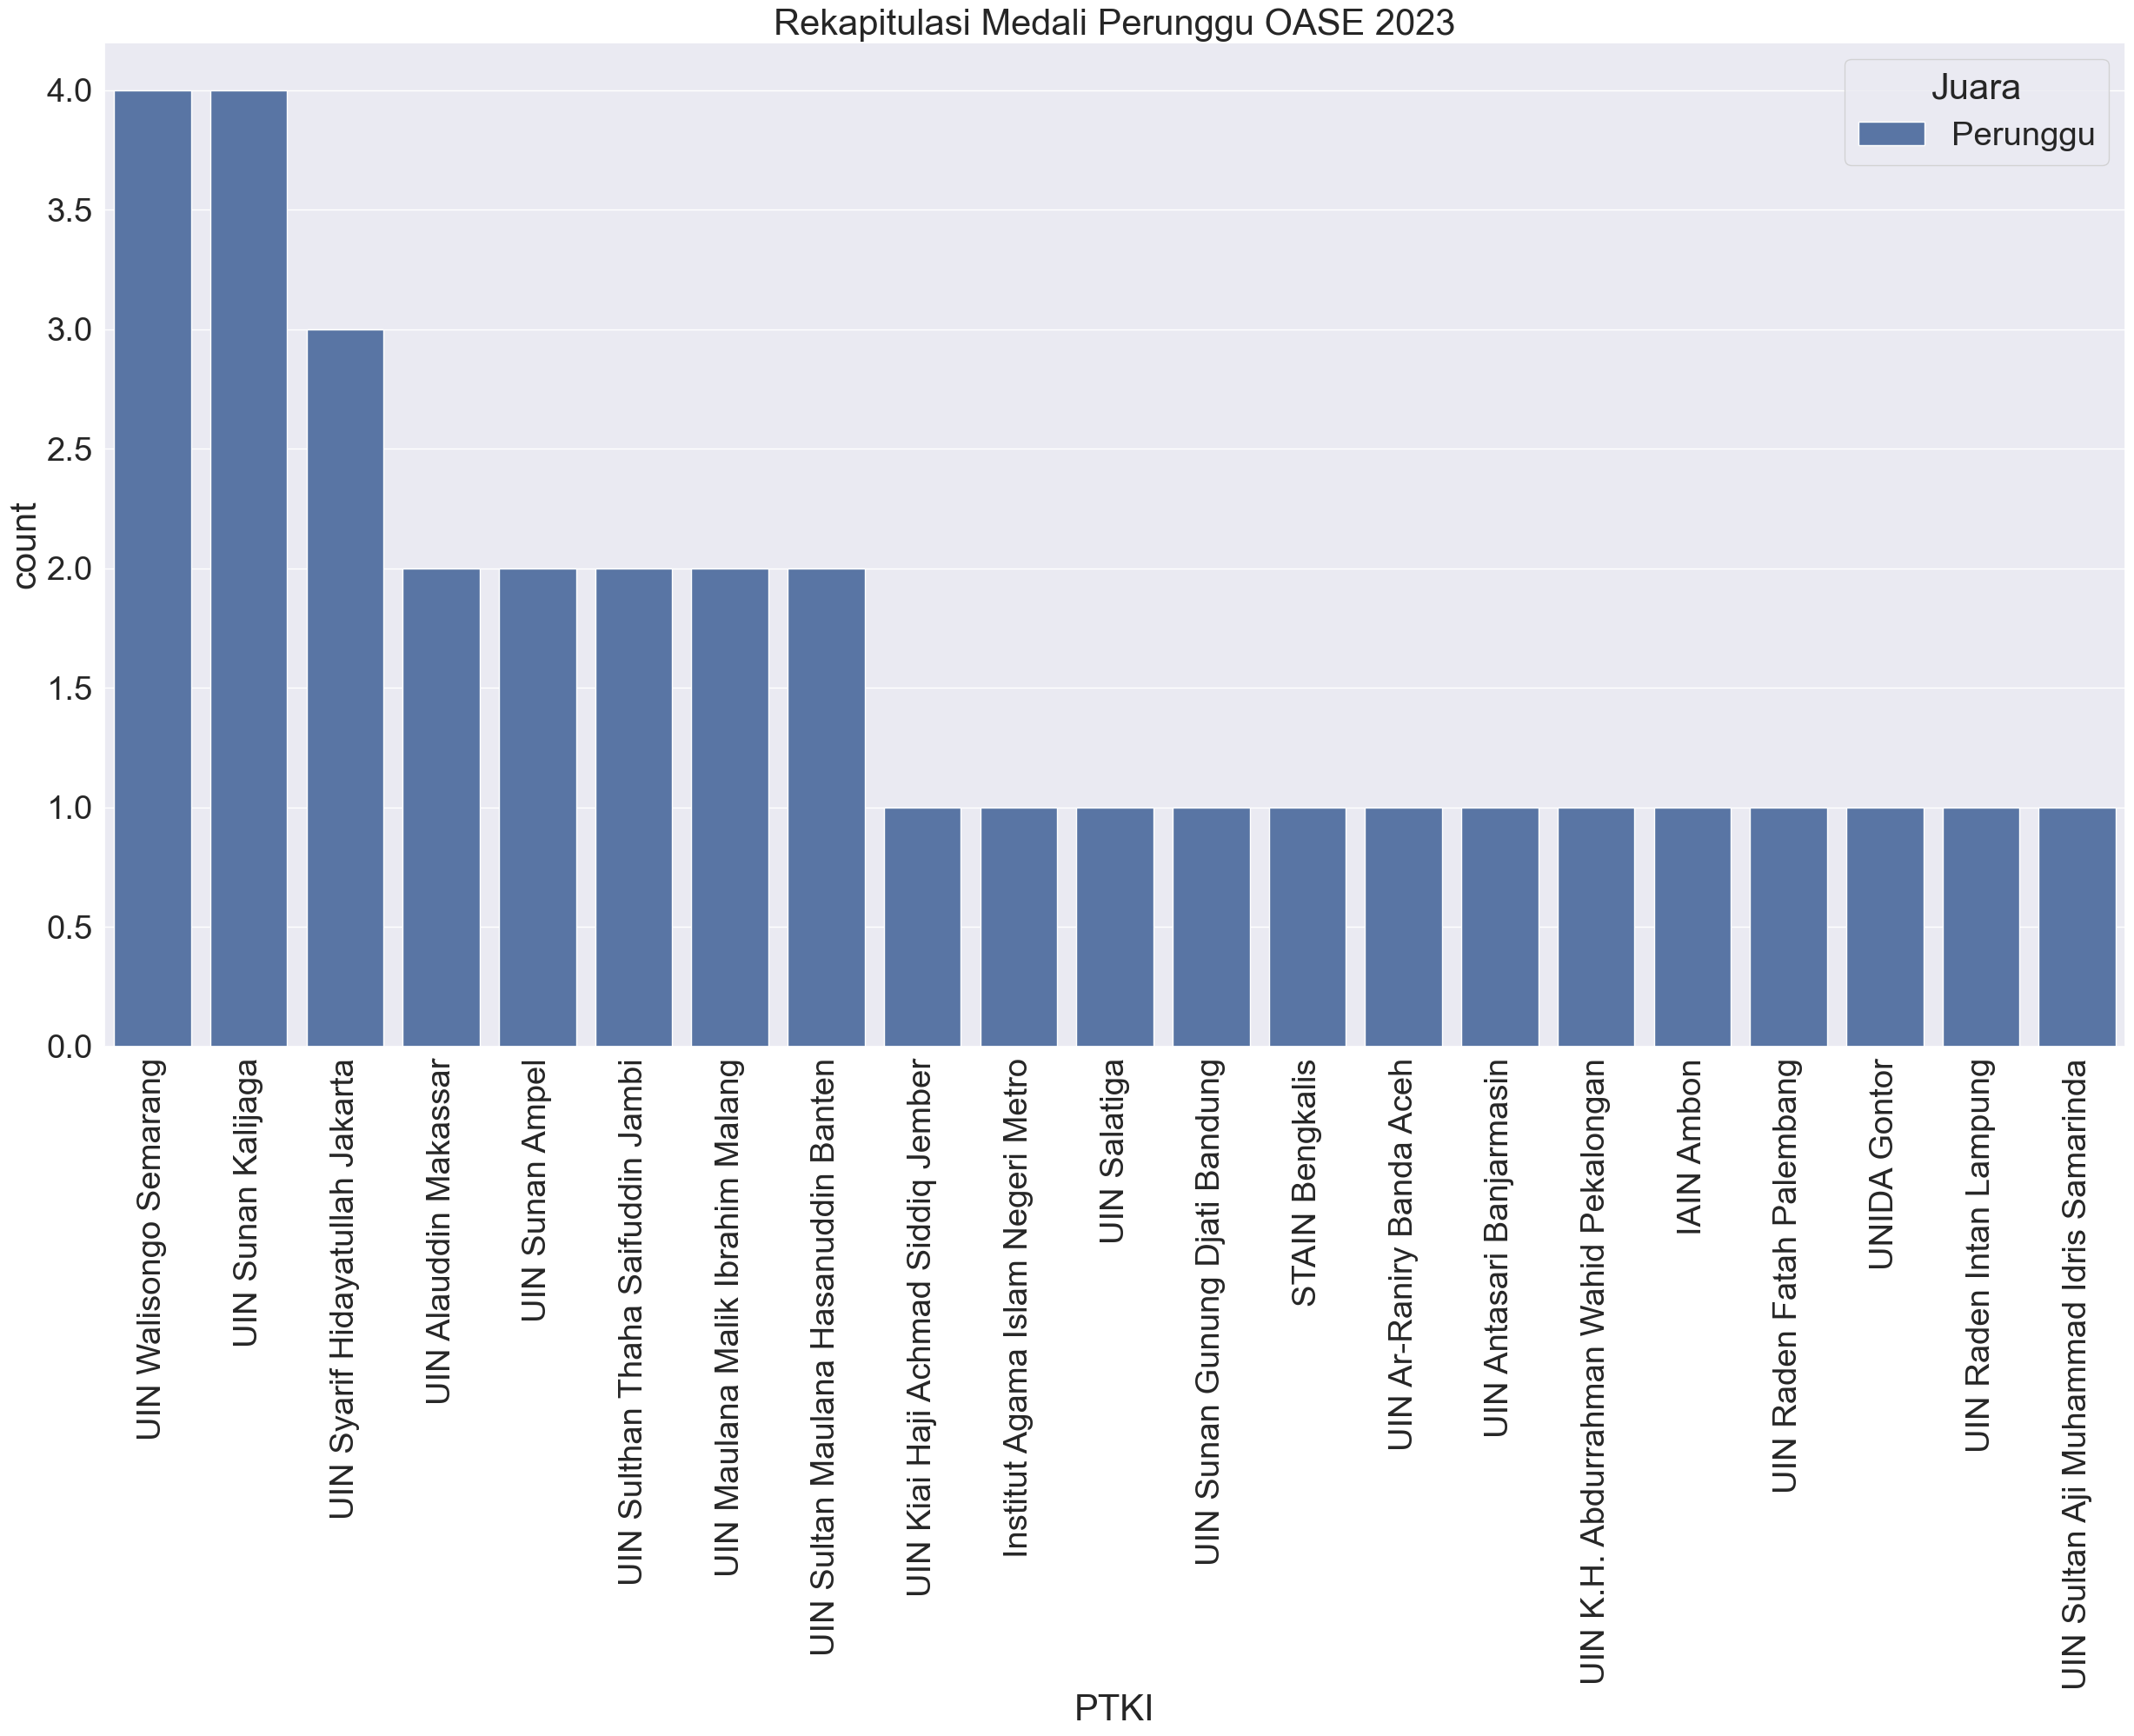

In [20]:
dBest = dfJoined[dfJoined.Juara.isin(['Perunggu'])]
dBest1 = dfJoined[dfJoined.Juara.isin(['Perunggu'])]
plt.figure(figsize=(30,15))
sns.set(font_scale=2.5)
ax = sns.countplot(data=dBest, x="PTKI", hue="Juara", order=dBest1['PTKI'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Rekapitulasi Medali Perunggu OASE 2023")
plt.show()